In [179]:
from fticr_toolkit import *
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import transforms
from copy import deepcopy
from uncertainties import ufloat

%load_ext autoreload
%autoreload 2

c2 = -1.496e4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
def getU(ion1, c2=-1.496e4):
    A, el, q1 = ideal_trap_physics.re_ionstr(ion1)
    m1, dm1 = ame.get_ion_mass(ion1)
    U1 = ideal_trap_physics.U0(q1, m1, nu_z, c2=c2)
    return A, q1, m1, dm1, U1

trapnr = 3
nu_z = 730e3
fitorder = 10
potential_order = 100 # potential series order, ~100th order is necessary!!
roux_c2 = ufloat(-1.496e-2, 0.007e-2)
roux_TR = 0.881

ion1 = "176Yb42+"
ion2 = "172Yb42+"

ion1 = "12C6+"
ion2 = "20Ne10+"

#ion1 = "187Re29+"
#ion2 = "187Re29+"

A, q1, m1, dm1, U1 = getU(ion1)
A, q2, m2, dm2, U2 = getU(ion2)
print(U1, U2, U1/U2)
#U1 = -42
#U2 = -43

#U1 = 0
machining_precision = 5e-6 #5e-6 # None # in meter!
seed = 2
tt = displacement.trap_tower(radius=5.000e-3, gap=0.15e-3, electrode_lengths=None, order = potential_order, # high order is necessarry!
                             machining_precision = machining_precision, random_seed=seed, fit_span_mm=2)

tt_ideal = displacement.trap_tower(radius=5.000e-3, gap=0.15e-3, electrode_lengths=None, order = potential_order,
                             machining_precision = None, random_seed=seed, fit_span_mm=2)
# center = 0.0361515

-14.571137896661785 -14.56563002779075 1.0003781414782968


In [299]:
# check the Dz 
for i in range(5):
    ulist = [0]*15
    ulist[4+i] = 0
    ulist[5+i] = 1
    print(ulist)
    zp, pot = tt_ideal.Ulist2potential(ulist)
    #print(zp)
    #print(pot)
    l = len(pot)
    print(np.sqrt(pot[int(l/2)]))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.2676146811378187
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
0.5664521247577111
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
0.45794769679639447
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
0.5667777177379275
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
0.2678620020044848


In [ ]:
### what are the capabilities here?
# just show the potential for a typicall configuration, no offsets

trap_settings = {
        1 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0]
        },
        2 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0],
        },
        3 : {
            "U0" : -10,
            "TR" : 0.881032,
            "Offset" : [0, 0], # +-13e-06
            #"Offset" : [-0.003393, 0.003393], # +-13e-06
            #"Offset" : [0, 0], # +-13e-06
            #"Offset" : [-0.002697, 0.002697], # +-13e-06
            #"Offset" : [-0.002723, 0.002723], # +-13e-06
        },
        4 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0]
            #"Offset" : [0.021, -0.021]
        },
        5 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0]
        }
}

z, p = tt_ideal.trapsettings2potential(trap_settings, trap=3, span= 12)
zc, pc = tt_ideal.trapsettings2potential(trap_settings, trap=3, span= 0.5)
xmina, popt, perr = tt_ideal.trapsettings2fitminimum(trap_settings, 3, order=fitorder, full=True)
print(xmina)
for i, p in enumerate(reversed(popt)):
    print("c", i, p)
popt = np.polyfit(zc, pc, 2)
yfit = np.poly1d(popt)(z)


mpl.rcParams.update(mpl.rcParamsDefault)


plt.rcParams['text.latex.preamble'] = r"""
\usepackage[scaled]{helvet}\usepackage{sansmath}\sansmath\usepackage{amsmath}\usepackage{mathtools}
\newcommand*\standardrel{<}% Change this to `=' for mtpro2
\newcommand*\standardbin{+}
% Tabular relation and binary symbols
\makeatletter
\newcommand*\tabularrel[1]{%
  \mathrel{\mathpalette{\@tabularsym\standardrel}{#1}}%
}
\newcommand*\tabularbin[1]{%
  \mathbin{\mathpalette{\@tabularsym\standardbin}{#1}}%
}
\newcommand*\@tabularsym[3]{%
  % #1: standard symbol
  % #2: math style
  % #3: user symbol
  \setbox\z@\hbox{$#2#1\m@th$}%
  \hbox to\wd\z@{\hss$#2#3\m@th$\hss}%
}
\makeatother"""
#Options
params = {'text.usetex' : True,
          'font.size' : 16,
          }
plt.rcParams.update(params)
plt.figure(figsize=(5,5))
plt.grid()
ax1 = plt.gca()
ax1.tick_params(direction="in", bottom=True, top=True, left=True, right=True)

plt.plot(p, z, c='k')
plt.plot(yfit, z, '-.', c='gray')
#plt.vlines(0, min(z), max(z))
plt.ylim(min(z), max(z))
plt.xlim(1, -8.5)
plt.ylabel(r'z (mm)')
plt.xlabel(r'$\phi$ (V)')
plt.tight_layout()
plt.savefig("trap_potential.pdf", bbox_inches='tight')
plt.savefig("trap_potential.png", bbox_inches='tight')
plt.show()



-0.012041996162185402


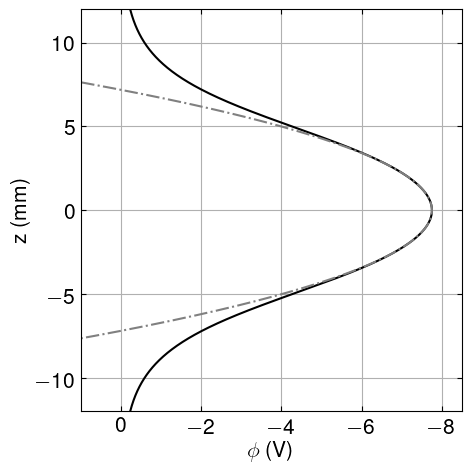

In [183]:
# what are the capabilities here?
# just show the potential for a typicall configuration, no offsets

trap_settings = {
        1 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0]
        },
        2 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0],
        },
        3 : {
            "U0" : -10,
            "TR" : 0.881032,
            "Offset" : [0, 0], # +-13e-06
            #"Offset" : [-0.003393, 0.003393], # +-13e-06
            #"Offset" : [0, 0], # +-13e-06
            #"Offset" : [-0.002697, 0.002697], # +-13e-06
            #"Offset" : [-0.002723, 0.002723], # +-13e-06
        },
        4 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0]
            #"Offset" : [0.021, -0.021]
        },
        5 : {
            "U0" : 0,
            "TR" : 0.881032,
            "Offset" : [0, 0]
        }
}

z, p = tt.trapsettings2potential(trap_settings, trap=3, span= 12)
zc, pc = tt.trapsettings2potential(trap_settings, trap=3, span= 0.5)
xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, 3, order=fitorder, full=True)
print(xmina)
popt = np.polyfit(zc, pc, 2)
yfit = np.poly1d(popt)(z)


mpl.rcParams.update(mpl.rcParamsDefault)


plt.rcParams['text.latex.preamble'] = r"""
\usepackage[scaled]{helvet}\usepackage{sansmath}\sansmath\usepackage{amsmath}\usepackage{mathtools}
\newcommand*\standardrel{<}% Change this to `=' for mtpro2
\newcommand*\standardbin{+}
% Tabular relation and binary symbols
\makeatletter
\newcommand*\tabularrel[1]{%
  \mathrel{\mathpalette{\@tabularsym\standardrel}{#1}}%
}
\newcommand*\tabularbin[1]{%
  \mathbin{\mathpalette{\@tabularsym\standardbin}{#1}}%
}
\newcommand*\@tabularsym[3]{%
  % #1: standard symbol
  % #2: math style
  % #3: user symbol
  \setbox\z@\hbox{$#2#1\m@th$}%
  \hbox to\wd\z@{\hss$#2#3\m@th$\hss}%
}
\makeatother"""
#Options
params = {'text.usetex' : True,
          'font.size' : 16,
          }
plt.rcParams.update(params)
plt.figure(figsize=(5,5))
plt.grid()
ax1 = plt.gca()
ax1.tick_params(direction="in", bottom=True, top=True, left=True, right=True)

plt.plot(p, z, c='k')
plt.plot(yfit, z, '-.', c='gray')
#plt.vlines(0, min(z), max(z))
plt.ylim(min(z), max(z))
plt.xlim(1, -8.5)
plt.ylabel(r'z (mm)')
plt.xlabel(r'$\phi$ (V)')
plt.tight_layout()
plt.savefig("trap_potential.pdf", bbox_inches='tight')
plt.savefig("trap_potential.png", bbox_inches='tight')
plt.show()



In [184]:
trap_settings = {
        1 : {
            "U0" : U1,
            "TR" : 0.881032,
            "Offset" : [0, 0]
        },
        2 : {
            "U0" : U2,
            "TR" : 0.881032,
            "Offset" : [0, 0],
        },
        3 : {
            "U0" : U1,
            "TR" : 0.881032,
            "Offset" : [0, 0], # +-13e-06
            #"Offset" : [-0.003393, 0.003393], # +-13e-06
            #"Offset" : [0, 0], # +-13e-06
            #"Offset" : [-0.002697, 0.002697], # +-13e-06
            #"Offset" : [-0.002723, 0.002723], # +-13e-06
        },
        4 : {
            "U0" : U2,
            "TR" : 0.881032,
            "Offset" : [0, 0]
            #"Offset" : [0.021, -0.021]
        },
        5 : {
            "U0" : U1,
            "TR" : 0.881032,
            "Offset" : [0, 0]
        }
}


## Effective C2 changes by voltage changes

In [185]:
# original C2
trapnr = 2
xmina, popt, perr = tt_ideal.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
c0 = ufloat(popt[-1], perr[-1])
c1 = ufloat(popt[-2], perr[-2])
c2 = ufloat(popt[-3], perr[-3])
c3 = ufloat(popt[-4], perr[-4])
c4 = ufloat(popt[-5], perr[-5])
c5 = ufloat(popt[-6], perr[-6])
c6 = ufloat(popt[-7], perr[-7])
print(c0)
print(c1)
print(c2)
print(c2-roux_c2)
print(c4)
print(c6)
print(c1)
print(c3)
print(c0)

0.775564916072+/-0.000000000012
(0+/-4)e-11
-0.01496165644+/-0.00000000009
(-0+/-7)e-05
(-1.077+/-0.017)e-08
(1.120+/-0.012)e-08
(0+/-4)e-11
(-0.0+/-1.0)e-10
0.775564916072+/-0.000000000012


In [186]:
# changes of c2 by offsetting each trap electrode
dU = 0.001
for i in range(5):
    offsets = [0,0,0,0,0]
    offsets[i] = dU
    trap_settings[trapnr]["Offset"] = offsets
    #xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings, trapnr, order=fitorder, full=True)
    c2_here = ufloat(popt[-3], perr[-3])
    print("offsets", offsets, "c2 difference", c2_here - c2)
  
# changes of c2 by common offsets
dU = 0.001
for i in range(3):
    offsets = [0,0,0,0,0]
    offsets[i] = dU
    offsets[4-i] = dU
    trap_settings[trapnr]["Offset"] = offsets
    #xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings, trapnr, order=fitorder, full=True)
    c2_here = ufloat(popt[-3], perr[-3])
    print("offsets", offsets, "c2 difference", c2_here - c2)

# changes of c2 by common offsets
dU = 1
for i in range(3):
    offsets = [0,0,0,0,0]
    #offsets[i] = dU
    #offsets[4-i] = dU
    trap_settings[trapnr]["Offset"] = offsets
    u0 = trap_settings[trapnr]["U0"]
    trap_settings[trapnr]["U0"] = u0 + i*dU
    u0 = trap_settings[trapnr]["U0"]
    #print(trap_settings)
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    print(xmina)
    xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings, trapnr, order=fitorder, full=True)
    c2_here = ufloat(popt[-3], perr[-3])
    print("U0", u0, "c2 difference", c2_here - c2, 'relative', (c2_here - c2)/c2)

offsets [0.001, 0, 0, 0, 0] c2 difference (-1.693284+/-0.000013)e-05
offsets [0, 0.001, 0, 0, 0] c2 difference (-1.643267+/-0.000013)e-05
offsets [0, 0, 0.001, 0, 0] c2 difference (-1.541302+/-0.000013)e-05
offsets [0, 0, 0, 0.001, 0] c2 difference (-1.643456+/-0.000013)e-05
offsets [0, 0, 0, 0, 0.001] c2 difference (-1.693238+/-0.000013)e-05
offsets [0.001, 0, 0, 0, 0.001] c2 difference (-1.742854+/-0.000013)e-05
offsets [0, 0.001, 0, 0.001, 0] c2 difference (-1.643022+/-0.000013)e-05
offsets [0, 0, 0.001, 0, 0] c2 difference (-1.541302+/-0.000013)e-05
-0.01204735625341889
U0 -14.56563002779075 c2 difference (-1.643670+/-0.000013)e-05 relative 0.001098588+/-0.000000009
-0.012047751816946577
U0 -13.56563002779075 c2 difference (-1.529006+/-0.000013)e-05 relative 0.001021950+/-0.000000009
-0.012048748422327954
U0 -11.56563002779075 c2 difference (-1.240193+/-0.000013)e-05 relative 0.000828914+/-0.000000009


### Nice! So noise on the correction electrodes is strongly relaxed as an effective c2 noise / axial frequency noise!

Endcaps are basically the same as the Ring, though if not correlated they average a little: delc2 = sqrt(2) delc2_EC = sqrt(2) x 2 x delc2_Ring

## TR C4 C6 changes

{1: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785},
 2: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -11.56563002779075},
 3: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785},
 4: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.56563002779075},
 5: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785}}
[-0.014957644076 -0.014957645934 -0.014957647792 -0.01495764965
 -0.014957651508 -0.014957653367 -0.014957655225 -0.014957657083
 -0.014957658941]


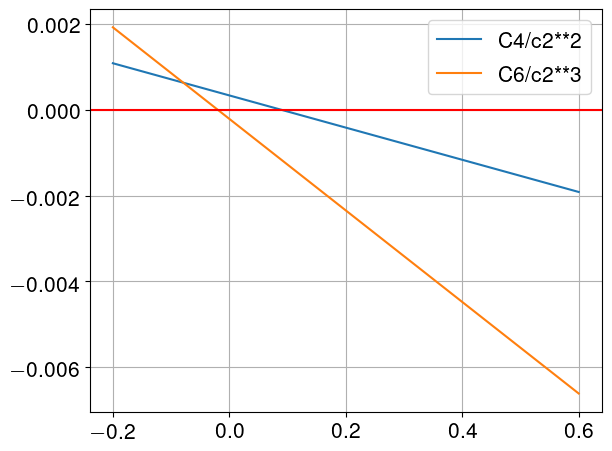

-0.0008407784066526182 7.63317206840892e-08 9.078696607824151e-05
3.577339682650277e-05 6.898894787868944e-10 -1.9284986609820314e-05


In [196]:
for nr, trapset in trap_settings.items():
    trap_settings[nr]['Offset'] = [0,0,0,0,0]
    
pprint(trap_settings)

# changes of c4 by common offsets
original_TR = trap_settings[trapnr]["TR"]
original_TR = 0.881032

dTR = np.arange(-0.2, 0.7, 0.1)*1e-3 # (mUnits)
C2s = []
C4s = []
C6s = []
for i in dTR:
    trap_settings[trapnr]["TR"] = original_TR + i
    #print(trap_settings[trapnr]["TR"])
    xmina, popt, perr = tt_ideal.trapsettings2fitminimum(trap_settings, trapnr, order=13, full=True, show=False)
    C2_here = popt[-3]
    C2s.append(C2_here)
    C4_here = popt[-5]
    #C4s.append(C4_here/C2_here**2)
    C4s.append(C4_here)
    C6_here = popt[-7]
    #C6s.append(C6_here/C2_here**3)
    C6s.append(C6_here)

C2s = np.asarray(C2s)
C4s = np.asarray(C4s)
C6s = np.asarray(C6s)

print(C2s)
plt.plot(dTR*1000, C4s/C2s**2, label="C4/c2**2")
plt.plot(dTR*1000, C6s/C2s**3, label="C6/c2**3")
plt.grid()
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.tight_layout()
plt.show()

m, b = np.polyfit(dTR, C4s, 1)
# y = mx + b --@y=0--> x = -b/m
dtrc40 = -b/m
print(m, b, dtrc40)

m, b = np.polyfit(dTR, C6s, 1)
# y = mx + b --@y=0--> x = -b/m
dtrc60 = -b/m
print(m, b, dtrc60)

trap_settings[trapnr]["TR"] = original_TR

{1: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785},
 2: {'Offset': [0, 0, 0, 0, 0],
     'TR': 0.8816320000000001,
     'U0': -11.56563002779075},
 3: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785},
 4: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.56563002779075},
 5: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785}}
[-0.014957561488 -0.014957561488 -0.014957655794 -0.014957655794
 -0.014957658941 -0.014957658941 -0.01495765905  -0.01495765905
 -0.014957659054 -0.014957659054 -0.014957659054 -0.014957659054]


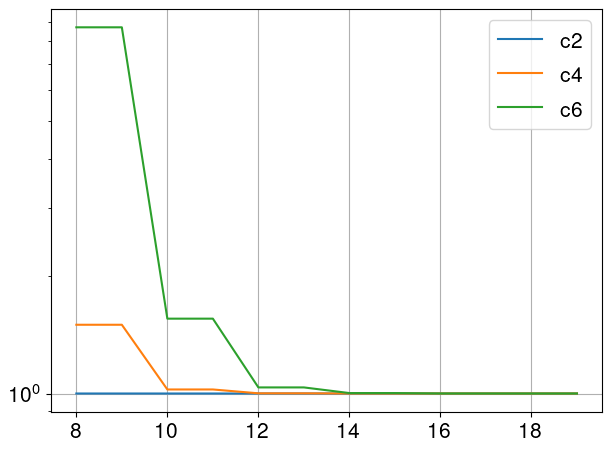

In [201]:
# sensitivity on fit order

for nr, trapset in trap_settings.items():
    trap_settings[nr]['Offset'] = [0,0,0,0,0]
    
pprint(trap_settings)

# changes of c4 by common offsets
original_TR = trap_settings[trapnr]["TR"]
original_TR = 0.881032

fit_order_list = np.arange(8, 20, 1)
C2s = []
C4s = []
C6s = []
for order in fit_order_list:
    trap_settings[trapnr]["TR"] = original_TR + i
    #print(trap_settings[trapnr]["TR"])
    xmina, popt, perr = tt_ideal.trapsettings2fitminimum(trap_settings, trapnr, order=order, full=True, show=False)
    C2_here = popt[-3]
    C2s.append(C2_here)
    C4_here = popt[-5]
    #C4s.append(C4_here/C2_here**2)
    C4s.append(C4_here)
    C6_here = popt[-7]
    #C6s.append(C6_here/C2_here**3)
    C6s.append(C6_here)

C2s = np.asarray(C2s)
C4s = np.asarray(C4s)
C6s = np.asarray(C6s)

print(C2s)
plt.plot(fit_order_list, C2s/C2s[-1], label="c2")
plt.plot(fit_order_list, C4s/C4s[-1], label="c4")
plt.plot(fit_order_list, C6s/C6s[-1], label="c6")
plt.yscale("log")
plt.grid()
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.tight_layout()
plt.show()


## Odd Ci effect by patch potentials

In [84]:
# changes of c4 by common offsets
original_offsets = deepcopy(trap_settings[trapnr]["Offset"])
trap_settings_Codd = deepcopy(trap_settings)

xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings_Codd, trapnr, order=fitorder, full=True)
zpos_original = xmina
print('original', trap_settings_Codd[trapnr]["Offset"], xmina, "trap", trapnr)

dU = np.arange(-0.050, 0.050, 0.001)# (mV)
C0s = []
C1s = []
C2s = []
C3s = []
C4s = []
C5s = []
C6s = []
xminas = []
for i in dU:
    offsets = deepcopy(original_offsets)
    offsets[1] = offsets[1] + i
    offsets[3] = offsets[3] - i
    print(offsets, end='\r')
    trap_settings_Codd[trapnr]["Offset"] = offsets
    # if you are interested in the minimum position change, use this:
    #xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings_Codd, trapnr, order=fitorder, full=True)
    # if you are interested in the effective parameters at that minimum, use this:
    xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings_Codd, trapnr, order=fitorder, full=True)
    C0_here = popt[-1]
    C1_here = popt[-2]
    C2_here = popt[-3]
    C3_here = popt[-4]
    C4_here = popt[-5]
    C5_here = popt[-6]
    C6_here = popt[-7]
    C0s.append(C0_here)
    C1s.append(C1_here)
    C2s.append(C2_here)
    C3s.append(C3_here)
    C4s.append(C4_here)
    C5s.append(C5_here)
    C6s.append(C6_here)
    xminas.append(xmina)

#C1C3s[C1C3s > 100] = None



original [0, 0, 0, 0, 0] -0.012048748860717747 trap 2


In [85]:
C1s = np.asarray(C1s)
C2s = np.asarray(C2s)
C3s = np.asarray(C3s)


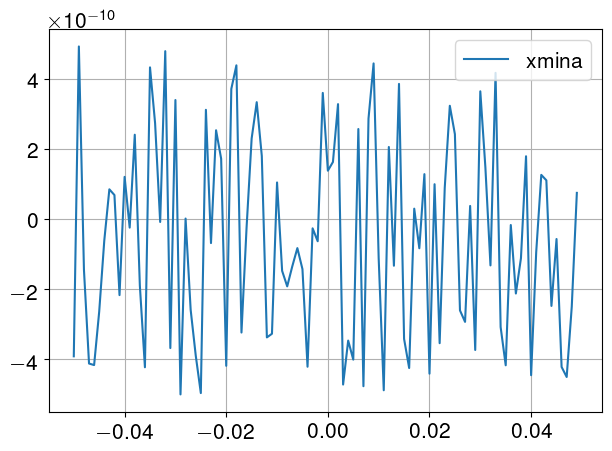

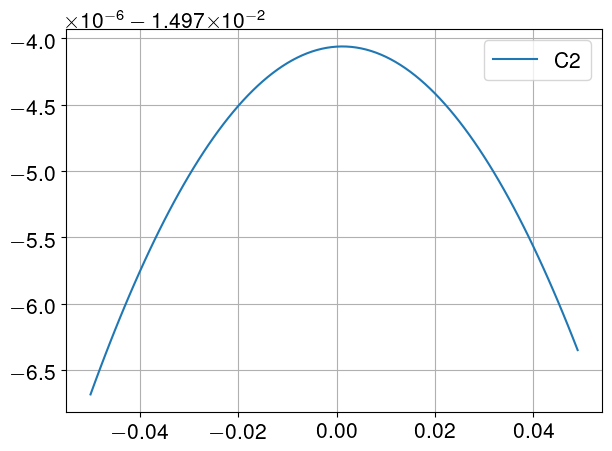

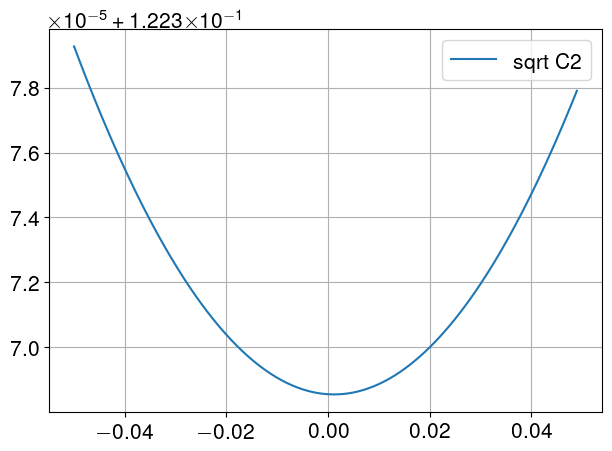

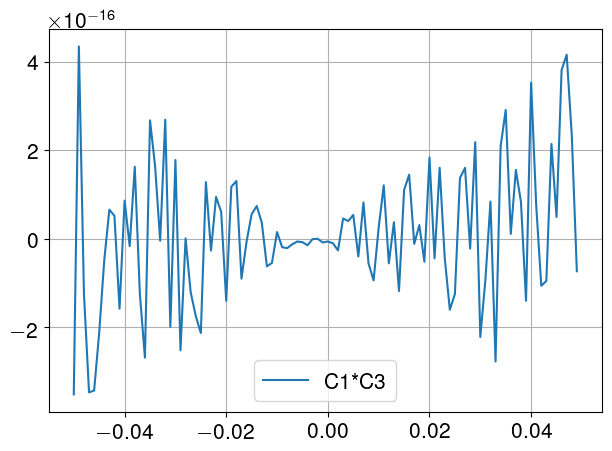

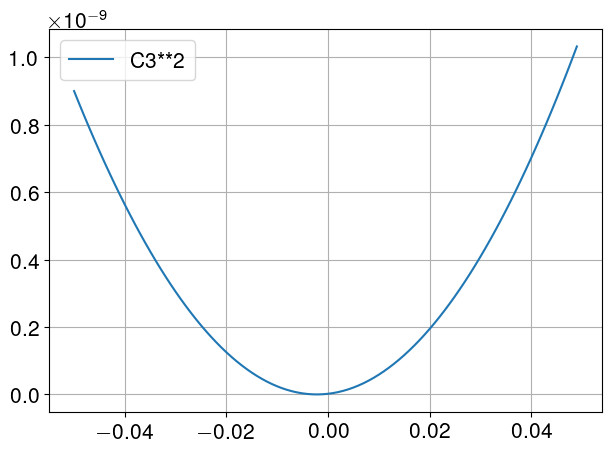

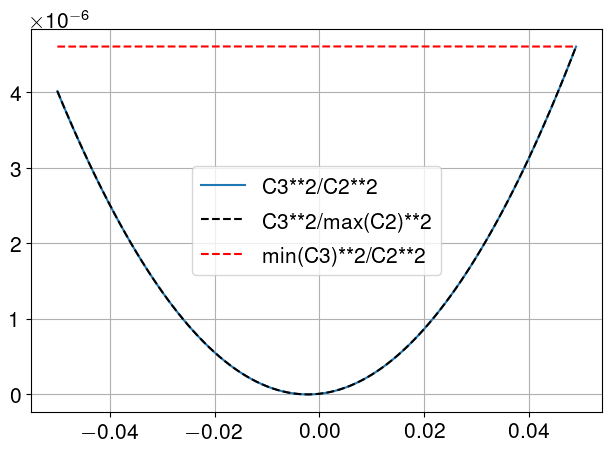

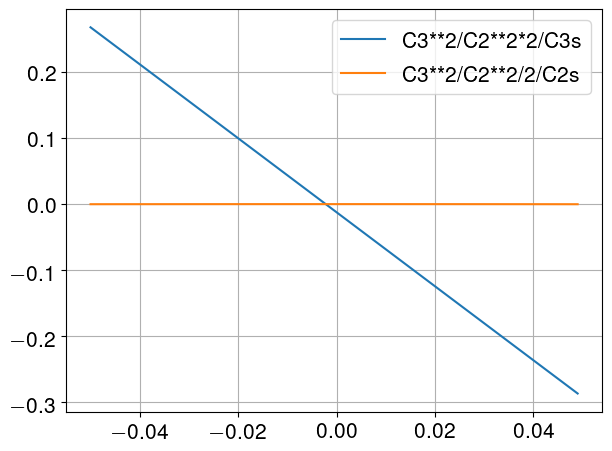

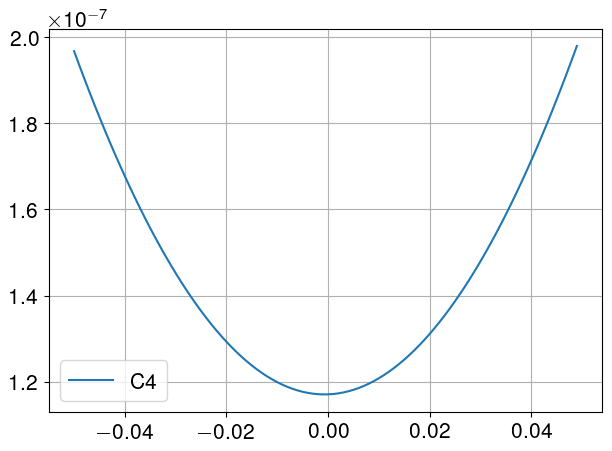

'\nplt.plot(dU, C5s, label="C5")\n#plt.plot(dTR, C6s, label="C6/c2**3")\nplt.grid()\nplt.legend()\nplt.tight_layout()\nplt.show()\n'

In [86]:

plt.cla()
plt.clf()

plt.plot(dU, xminas, label="xmina")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''
plt.plot(dU, C0s, label="C0")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.plot(dU, C1s, label="C1")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''
plt.plot(dU, C2s, label="C2")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(dU, np.sqrt(-C2s), label="sqrt C2")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''
plt.plot(dU, C3s, label="C3")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''
plt.plot(dU, C1s*C3s, label="C1*C3")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.plot(dU, C3s**2, label="C3**2")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.plot(dU, C3s**2/C2s**2, label="C3**2/C2**2")
plt.plot(dU, C3s**2/max(C2s)**2, "--", label="C3**2/max(C2)**2", c='k')
plt.plot(dU, min(C3s)**2/C2s**2, "--", label="min(C3)**2/C2**2", c='r')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.plot(dU, C3s**2/C2s**2*2/C3s, label="C3**2/C2**2*2/C3s")
plt.plot(dU, C3s**2/C2s**2/2/C2s, label="C3**2/C2**2/2/C2s")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.plot(dU, C4s, label="C4")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''
plt.plot(dU, C5s, label="C5")
#plt.plot(dTR, C6s, label="C6/c2**3")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''




515.4703723329573
correlation matrix failed:  'numpy.ndarray' object has no attribute 'derivatives'
radii 2.5026174831873455e-06 2.1475699003580692e-05 2.502617483187155e-06
515.6653290037661
correlation matrix failed:  'numpy.ndarray' object has no attribute 'derivatives'
radii 1.9385190993044195e-06 1.6638149813206046e-05 1.9385190993041124e-06
2.502617483187155e-06
2.1475699003580692e-05
2.5026174831873455e-06
730000.0


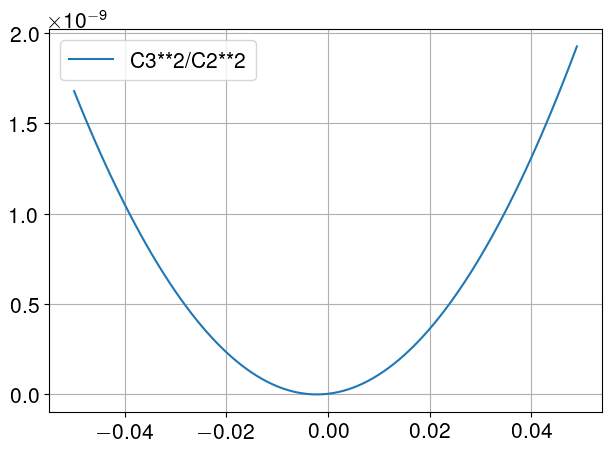

[7.716383108453e-03 7.397001059543e-03 7.084363885527e-03
 6.778472013578e-03 6.479325894147e-03 6.186925940678e-03
 5.901272563109e-03 5.622366170208e-03 5.350207156890e-03
 5.084795907835e-03 4.826132803905e-03 4.574218215707e-03
 4.329052500514e-03 4.090636005044e-03 3.858969072523e-03
 3.634052040078e-03 3.415885229483e-03 3.204468949891e-03
 2.999803522200e-03 2.801889223908e-03 2.610726359389e-03
 2.426315199032e-03 2.248656018240e-03 2.077749067541e-03
 1.913594612520e-03 1.756192884173e-03 1.605544125776e-03
 1.461648557087e-03 1.324506396098e-03 1.194117848070e-03
 1.070483116177e-03 9.536023859903e-04 8.434758351323e-04
 7.401036394334e-04 6.434859571360e-04 5.536229450730e-04
 4.705147462595e-04 3.941614951790e-04 3.245633185533e-04
 2.617203341428e-04 2.056326488010e-04 1.563003626988e-04
 1.137235672659e-04 7.790234157283e-05 4.883675946425e-05
 2.652688360857e-05 1.097276870890e-05 2.174460054384e-06
 1.319938737976e-07 4.845397677678e-06 1.631468979767e-05
 3.45398795715

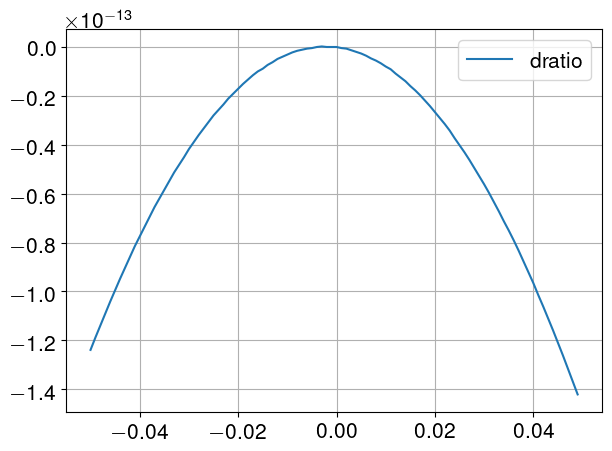

In [87]:
# thermal
omc1, omp1, omz1, omm1, p1, z1, m1 = ideal_trap_physics.ion_stats(ion1, nures=nu_z, U0=None, Tz=7, B0=7, nominal=True)
omc2, omp2, omz2, omm2, p2, z2, m2 = ideal_trap_physics.ion_stats(ion2, nures=nu_z, U0=None, Tz=7, B0=7, nominal=True)
print(m1)
print(z1)
print(p1)
print(omz1/2/np.pi)
factor1 = (-1)/16 * (18*((m1*1e3)**2 + (p1*1e3)**2) - 15*(z1*1e3)**2)
plt.plot(dU, factor1 * (C3s/C2s)**2, label="C3**2/C2**2")
plt.grid()
plt.legend() 
plt.tight_layout()
plt.show()

ratio = ideal_trap_physics.omegac_invariance(omp2, omz2, omm2)/ideal_trap_physics.omegac_invariance(omp1, omz1, omm1)
omz1 += systematics.domegaz_c3(p1*1e3, m1*1e3, z1*1e3, omz1, C3s, c2=-1.496e-2)
print(systematics.domegaz_c3(p1*1e3, m1*1e3, z1*1e3, omz1, C3s, c2=-1.496e-2))
omz2 += systematics.domegaz_c3(p2*1e3, m2*1e3, z2*1e3, omz2, C3s, c2=-1.496e-2)
ratio2 = ideal_trap_physics.omegac_invariance(omp2, omz2, omm2)/ideal_trap_physics.omegac_invariance(omp1, omz1, omm1)
dratio = ratio2 - ratio

plt.plot(dU, dratio, label="dratio")
plt.grid()
plt.legend() 
plt.tight_layout()
plt.show()

dU to offsets to minimize C3**2/C2**2 0.0021976748047551507


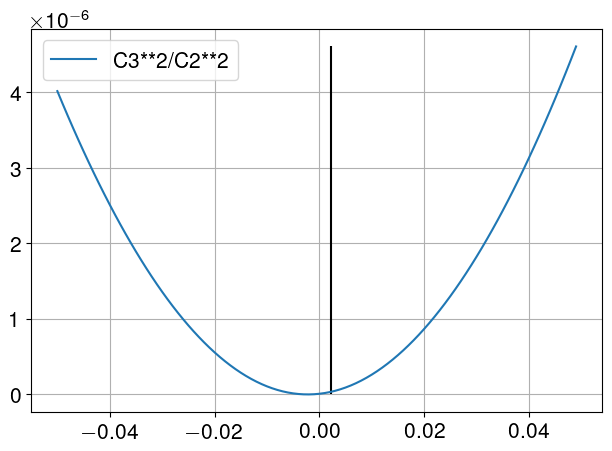

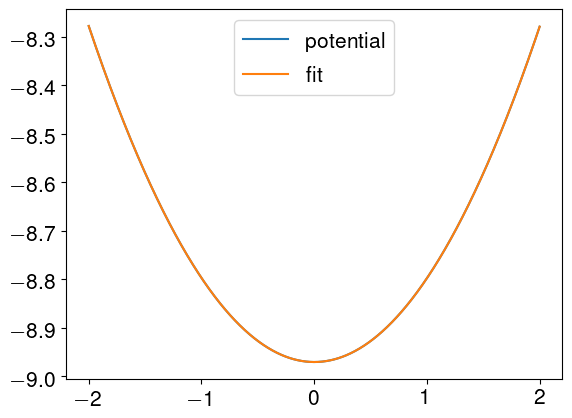

original position and offsets -0.012048748860717747 [0, 0, 0, 0, 0]
comp position and offsets 0.001170656152474318 [0, 0.0021976748047551507, 0, -0.0021976748047551507, 0]


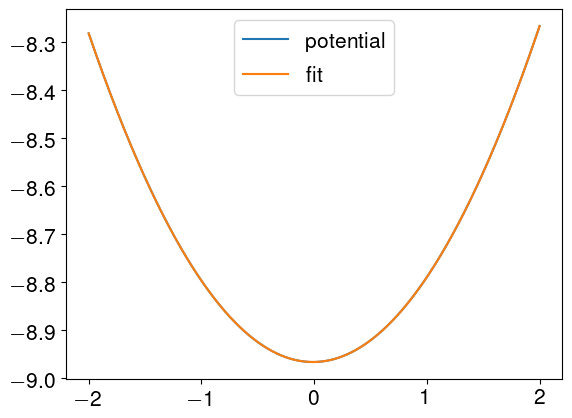

original position and offsets -0.01087964277387416 [0, 0, 0, 0, 0]


In [88]:
popt, pcov = np.polyfit(dU, C3s**2/C2s**2, 20, cov=True)
perr = np.sqrt(np.diag(pcov[::-1]))
#print(popt,perr)

p = np.poly1d(popt)
x_minmax = p.deriv().roots

# ignore the ones out of the range
in_range = []
for i in x_minmax:
    if i > min(dU) and i < max(dU):
        in_range.append(i)
minimum_dU = np.abs(in_range[-1])
print('dU to offsets to minimize C3**2/C2**2', minimum_dU)
plt.plot(dU, C3s**2/C2s**2, label="C3**2/C2**2")
plt.vlines(minimum_dU, min(C3s**2/C2s**2), max(C3s**2/C2s**2))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

offsets = [0,0,0,0,0]
offsets[1] = minimum_dU
offsets[3] = -minimum_dU
#print(offsets, end='\r')
trap_settings_Codd[trapnr]["Offset"] = offsets
# if you are interested in the minimum position change, use this:
xmina, popt, perr = tt_ideal.trapsettings2fitminimum(trap_settings_Codd, trapnr, order=fitorder, full=True, show=True)
print("original position and offsets", zpos_original, original_offsets)
print("comp position and offsets", xmina, offsets)
xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings_Codd, trapnr, order=fitorder, full=True, show=True)
print("original position and offsets", xmina, original_offsets)


## How about patch potentials?

In [89]:
# create random offsets:
np.random.seed(seed)
for idx, trap in trap_settings.items():
    trap['Offset'] = np.around((np.random.rand(5)-0.5)*1e-1, 4)
    #trap['Offset'] = np.asarray([0, 0, 0, 0.1, 0])
    #trap['Offset'] = np.asarray([0, 0, 0, 0, 0])

In [90]:
pprint(trap_settings)

{1: {'Offset': array([-0.0064, -0.0474,  0.005 , -0.0065, -0.008 ]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 2: {'Offset': array([-0.017 , -0.0295,  0.0119, -0.02  , -0.0233]),
     'TR': 0.881032,
     'U0': -11.56563002779075},
 3: {'Offset': array([ 0.0121,  0.0029, -0.0365,  0.0014, -0.0316]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 4: {'Offset': array([ 0.0285,  0.0354, -0.0006,  0.0347, -0.042 ]),
     'TR': 0.881032,
     'U0': -14.56563002779075},
 5: {'Offset': array([ 0.0005, -0.0435, -0.0072, -0.0403, -0.0373]),
     'TR': 0.881032,
     'U0': -14.571137896661785}}


In [91]:
original_offsets = deepcopy( trap_settings[trapnr]['Offset'] )
original_trap_settings = deepcopy( trap_settings )

In [92]:
def addoffsets(trap=2, asym=None, offsets=[0,0,0,0,0], asymEC=None, currentOffs=None):
    if asym is not None:
        offsets = [0, asym, 0, -asym, 0]
    if asymEC is not None:
        offsets = [asymEC, 0, 0, 0, -asymEC]
    
    if currentOffs is None:
        ol_offsets = deepcopy( original_offsets )
    else:
        ol_offsets = deepcopy( currentOffs )
        
    new_offsets = ol_offsets + offsets
    trap_settings[trap]['Offset'] = new_offsets
    #print(new_offsets)
    return trap_settings
    

In [93]:
xmina, popt, perr = tt.trapsettings2fitminimum(original_trap_settings, trapnr, order=fitorder, full=True)
originalxmin = xmina
originalc1 = popt[-2]
originalc3 = popt[-4]
print(originalxmin, "mm")
print(originalc1, "1/mm")
print(originalc3, "1/mm3")

pprint(popt)
pprint(perr)

-0.01405544174153276 mm
-0.00041980322821455577 1/mm
1.9404565258782254e-06 1/mm3
array([ 1.687034200316e-16, -1.052407878352e-17, -5.209719328282e-15,
       -5.956006383512e-17,  1.462958797576e-13,  1.229389341311e-14,
       -4.535970117663e-12, -4.384876605073e-13,  1.602718931728e-10,
        1.547694053840e-11, -6.328170943472e-09, -5.962264422619e-10,
        1.630953015828e-07,  1.254631067175e-08,  1.229371747782e-07,
        3.116742817462e-08, -2.280573164046e-06,  1.940456525878e-06,
       -1.493379078919e-02, -4.198032282146e-04,  7.766422781463e-01])
array([1.511920557509e-17, 1.513552722141e-17, 2.955755776888e-16,
       2.807423693063e-16, 2.460293471816e-15, 2.197087030493e-15,
       1.137049736539e-14, 9.434593400745e-15, 3.190041930581e-14,
       2.420674416419e-14, 5.579417827736e-14, 3.787267370833e-14,
       6.012320042819e-14, 3.534090899118e-14, 3.800312283810e-14,
       1.837578500331e-14, 1.271039778793e-14, 4.615467252941e-15,
       1.822202521343e-15

# Check position changes due to voltage stability


2.6695409658666e-08 -6.573910517155406e-10


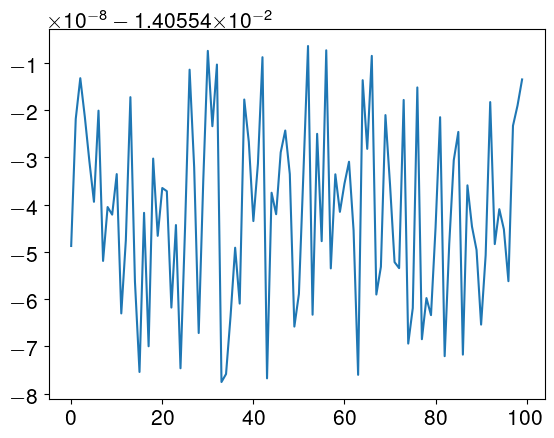

1.9361248348152803e-05 z std in um
B jitter 2.7299360170895453e-14 3.899908595842208e-15


In [94]:
U_array = (np.random.random(100) - 0.5)*1e-7
#plt.plot(U_array)
#plt.show()
print(np.std(U_array), np.mean(U_array))
xmins = []
offs = []

for i, U in enumerate(U_array):
    trap_settings = deepcopy(original_trap_settings)
    trap_settings = addoffsets(trap=trapnr, asym=None, offsets=[-U,-U,0,U,U])
    offs.append(trap_settings[trapnr]['Offset'][1])
    #pprint(trap_settings)
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    xmins.append(xmina)

    
#plt.plot(offs)
#plt.show()
    
plt.plot(xmins)
plt.show()
print(np.std(xmins)*1000, 'z std in um')
b1 = 1.41e-6 # T/mm
delB = np.std(xmins)*b1
print('B jitter', delB, delB/7)

# Asymmetry compensation simple (only with CE)

In [101]:
fitorder = 30
scan_range = 0.6
Uasym = np.linspace(-scan_range, scan_range, 51)

xmins = []
popts = np.zeros((len(Uasym), fitorder+1))
perrs = np.zeros((len(Uasym), fitorder+1))
xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
print(xmina)
xmina_original = xmina
pprint(trap_settings)


-0.012407179066969557
{1: {'Offset': array([-0.0064, -0.0474,  0.005 , -0.0065, -0.008 ]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 2: {'Offset': array([-0.017         , -0.026409925658,  0.0119        , -0.023090074342,
       -0.0233        ]),
     'TR': 0.881032,
     'U0': -11.56563002779075},
 3: {'Offset': array([ 0.0121,  0.0029, -0.0365,  0.0014, -0.0316]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 4: {'Offset': array([ 0.0285,  0.0354, -0.0006,  0.0347, -0.042 ]),
     'TR': 0.881032,
     'U0': -14.56563002779075},
 5: {'Offset': array([ 0.0005, -0.0435, -0.0072, -0.0403, -0.0373]),
     'TR': 0.881032,
     'U0': -14.571137896661785}}


In [102]:
# plot all c coeffs

def plotci(i, plot=True):
    idx = i+1
    x = Uasym
    y = popts[:,-idx]
    yerr = perrs[:,-idx]

    popt, pcov = np.polyfit(x, y, 1, rcond=None, full=False, w=None, cov=True)
    perr = np.sqrt(np.diag(pcov))
    root = -popt[1]/popt[0]
    print('c'+str(i)+' == 0 @', root)
    if plot:
        
        if abs(root) < scan_range:
            plt.vlines([root], np.min(y), np.max(y))   
        plt.errorbar(x, y, yerr, label='c'+str(i))
        plt.legend()
        plt.tight_layout()
        plt.grid(which='both')
        plt.show()
    
    return root

In [103]:
def findasym(c=3, plot=False):
    global popts, perrs
    
    for i, asym in enumerate(Uasym):
        trap_settings = addoffsets(trap=trapnr, asym=asym, offsets=[0,0,0,0,0])
        #pprint(trap_settings)
        xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
        xmins.append(xmina)
        popts[i] = popt
        perrs[i] = perr

    return plotci(c, plot=plot)

asymc30 = findasym(3)

trap_settings = addoffsets(trap=trapnr, asym=asymc30, offsets=[0,0,0,0,0])
pprint(trap_settings)
xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
c1 = popt[-2]
c3 = popt[-4]
print("xmin new, old, diff", xmina, xmina_original, xmina-xmina_original)
print("c1 new, old, diff", c1, originalc1, c1-originalc1)
print("c3 new, old, diff", c3, originalc3, c3-originalc3)
pprint(popt)
pprint(perr)

c3 == 0 @ 0.0030900743416624847
{1: {'Offset': array([-0.0064, -0.0474,  0.005 , -0.0065, -0.008 ]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 2: {'Offset': array([-0.017         , -0.026409925658,  0.0119        , -0.023090074342,
       -0.0233        ]),
     'TR': 0.881032,
     'U0': -11.56563002779075},
 3: {'Offset': array([ 0.0121,  0.0029, -0.0365,  0.0014, -0.0316]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 4: {'Offset': array([ 0.0285,  0.0354, -0.0006,  0.0347, -0.042 ]),
     'TR': 0.881032,
     'U0': -14.56563002779075},
 5: {'Offset': array([ 0.0005, -0.0435, -0.0072, -0.0403, -0.0373]),
     'TR': 0.881032,
     'U0': -14.571137896661785}}
xmin new, old, diff -0.012407179066969557 -0.01405544174153276 0.0016482626745632032
c1 new, old, diff -0.0003705738397178112 -0.00041980322821455577 4.9229388496744566e-05
c3 new, old, diff 5.6954213540653666e-15 1.9404565258782254e-06 -1.9404565201828042e-06
array([-1.991590945482e-17,  3.463910541067e-17

zero displacement at asym 0.02646541673033694


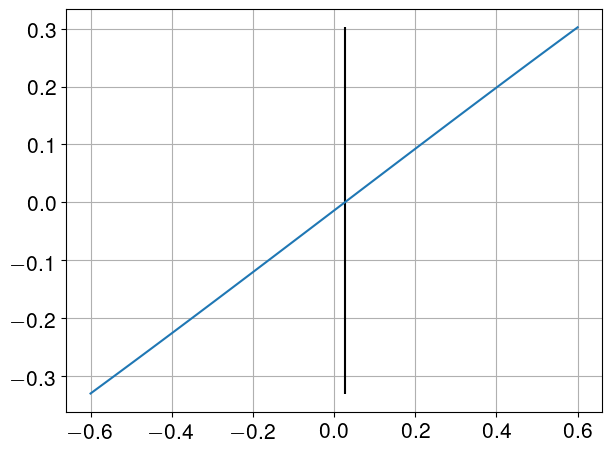

In [104]:
# get zero displacement value
popt, pcov = np.polyfit(Uasym, xmins, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
root = -popt[1]/popt[0]
print('zero displacement at asym', root)
plt.plot(Uasym, xmins)
plt.vlines([root], np.min(xmins), np.max(xmins))
plt.grid(which='both')
plt.tight_layout()
plt.show()


c1 == 0 @ 0.026350584958397073


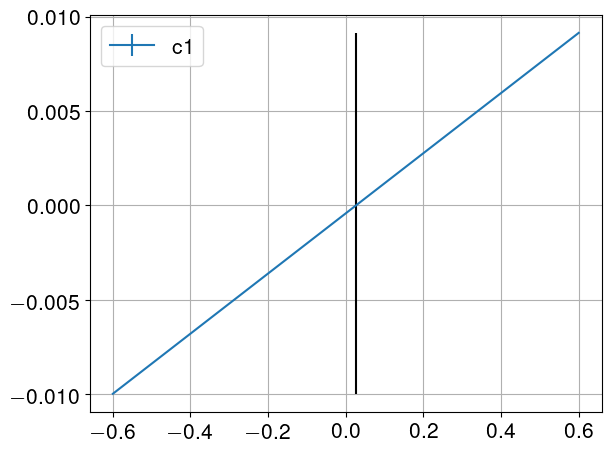

c2 == 0 @ -824.1899447043743


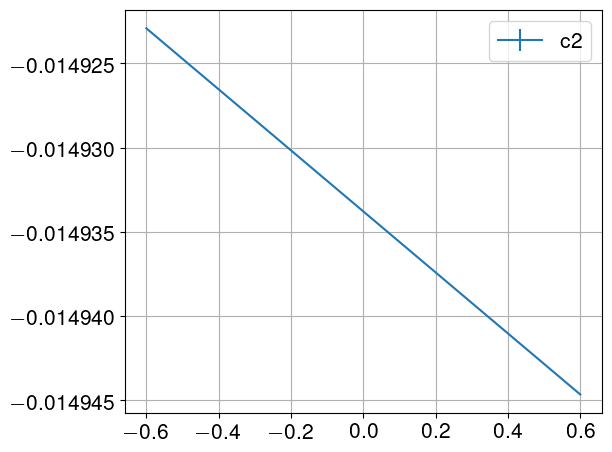

c3 == 0 @ 0.0030900743416624847


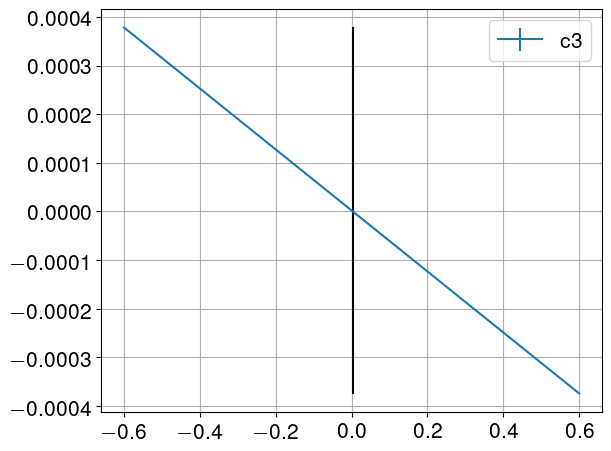

c4 == 0 @ 4.134263636213917


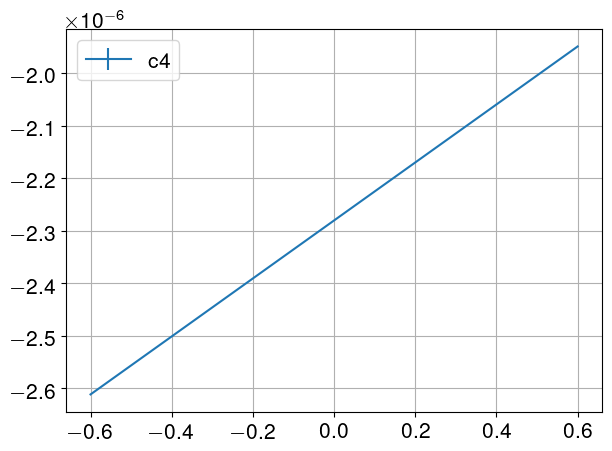

c5 == 0 @ -0.0025381795739123367


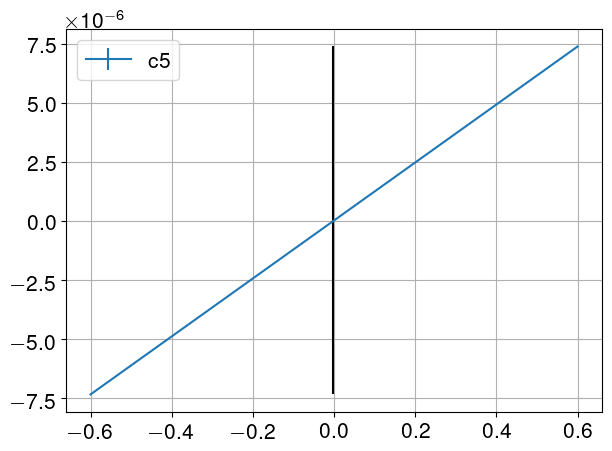

c6 == 0 @ 13.958649065503424


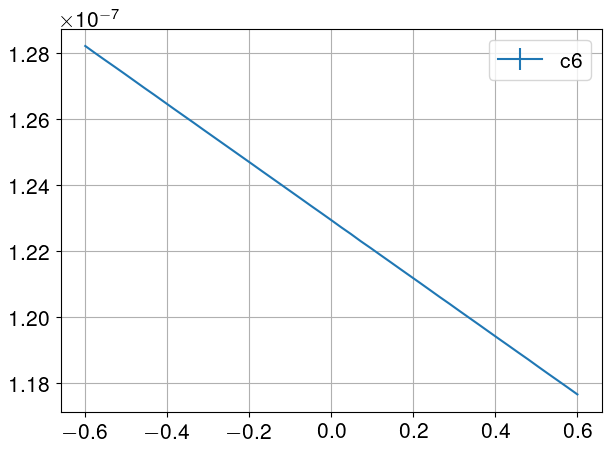

13.958649065503424

In [105]:
plotci(1)
plotci(2)
plotci(3)
plotci(4)
plotci(5)
plotci(6)

In [106]:
 # same again for c2 at minimum

In [111]:
fitorder = 30
scan_range = 0.6
Uasym = np.linspace(-scan_range, scan_range, 51)

xmins = []
popts = np.zeros((len(Uasym), fitorder+1))
perrs = np.zeros((len(Uasym), fitorder+1))

xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
print(xmina)
xmina_original = xmina
pprint(trap_settings)

-0.010970053322166806
{1: {'Offset': array([-0.0064, -0.0474,  0.005 , -0.0065, -0.008 ]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 2: {'Offset': array([-0.017        , -0.02371568528,  0.0119       , -0.02578431472,
       -0.0233       ]),
     'TR': 0.881032,
     'U0': -11.56563002779075},
 3: {'Offset': array([ 0.0121,  0.0029, -0.0365,  0.0014, -0.0316]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 4: {'Offset': array([ 0.0285,  0.0354, -0.0006,  0.0347, -0.042 ]),
     'TR': 0.881032,
     'U0': -14.56563002779075},
 5: {'Offset': array([ 0.0005, -0.0435, -0.0072, -0.0403, -0.0373]),
     'TR': 0.881032,
     'U0': -14.571137896661785}}


In [112]:
# plot all c coeffs

def plotci_poly10(i, plot=True):
    idx = i+1
    x = Uasym
    y = popts[:,-idx]
    yerr = perrs[:,-idx]

    popt, pcov = np.polyfit(x, y, 10, rcond=None, full=False, w=None, cov=True)
    perr = np.sqrt(np.diag(pcov))
    roots = np.poly1d(popt).deriv().roots
    reals = roots[np.isreal(roots)]
    root = reals[0].real
    print(root)
    #root = -popt[1]/popt[0]
    print('c'+str(i)+' == 0 @', root)
    if plot:
        
        if abs(root) < scan_range:
            plt.vlines([root], np.min(y), np.max(y))   
        plt.errorbar(x, y, yerr, label='c'+str(i))
        plt.legend()
        plt.tight_layout()
        plt.grid(which='both')
        plt.show()
    
    return root

In [123]:
def findasym_atmin(c=2, plot=False):
    global popts, perrs
    
    for i, asym in enumerate(Uasym):
        trap_settings = addoffsets(trap=trapnr, asym=asym, offsets=[0,0,0,0,0])
        #pprint(trap_settings)
        xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings, trapnr, order=fitorder, full=True)
        xmins.append(xmina)
        popts[i] = popt
        perrs[i] = perr

    return plotci_poly10(c, plot=plot)

asymc20 = findasym_atmin(2)

pprint(trap_settings)
ideal_trap_settings = deepcopy(trap_settings)
for key, val in ideal_trap_settings.items():
    ideal_trap_settings[key]["Offset"] = [0,0,0,0,0]
ideal_trap_settings[trapnr]["Offset"] = [0,asymc20,0,-asymc20,0]
pprint(ideal_trap_settings)
xmina, popt, perr = tt_ideal.trapsettings2fitminimum(ideal_trap_settings, trapnr, order=fitorder, full=True)
c1 = popt[-2]
c2 = popt[-3]
c3 = popt[-4]
print("xmin new, old, diff", xmina, xmina_original, xmina-xmina_original)
print("c1 new, old, diff", c1, originalc1, c1-originalc1)
print("c3 new, old, diff", c3, originalc3, c3-originalc3)
pprint(popt)
pprint(perr)

0.005784314720294813
c2 == 0 @ 0.005784314720294813
{1: {'Offset': array([-0.0064, -0.0474,  0.005 , -0.0065, -0.008 ]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 2: {'Offset': array([-0.017 ,  0.5705,  0.0119, -0.62  , -0.0233]),
     'TR': 0.881032,
     'U0': -11.56563002779075},
 3: {'Offset': array([ 0.0121,  0.0029, -0.0365,  0.0014, -0.0316]),
     'TR': 0.881032,
     'U0': -14.571137896661785},
 4: {'Offset': array([ 0.0285,  0.0354, -0.0006,  0.0347, -0.042 ]),
     'TR': 0.881032,
     'U0': -14.56563002779075},
 5: {'Offset': array([ 0.0005, -0.0435, -0.0072, -0.0403, -0.0373]),
     'TR': 0.881032,
     'U0': -14.571137896661785}}
{1: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785},
 2: {'Offset': [0, 0.005784314720294813, 0, -0.005784314720294813, 0],
     'TR': 0.881032,
     'U0': -11.56563002779075},
 3: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.571137896661785},
 4: {'Offset': [0, 0, 0, 0, 0], 'TR': 0.881032, 'U0': -14.5

0.42048461380533925
c1 == 0 @ 0.42048461380533925


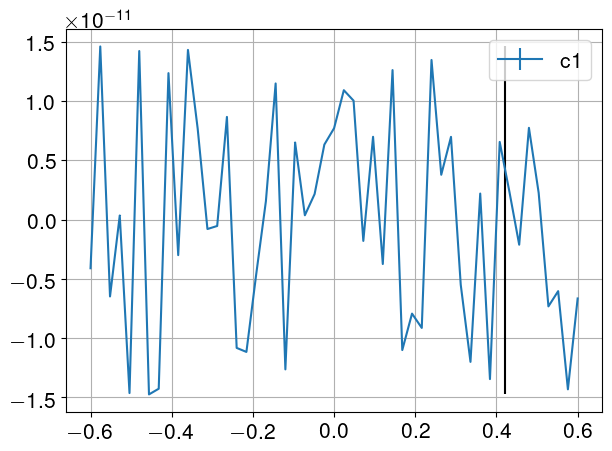

0.005784314720294813
c2 == 0 @ 0.005784314720294813


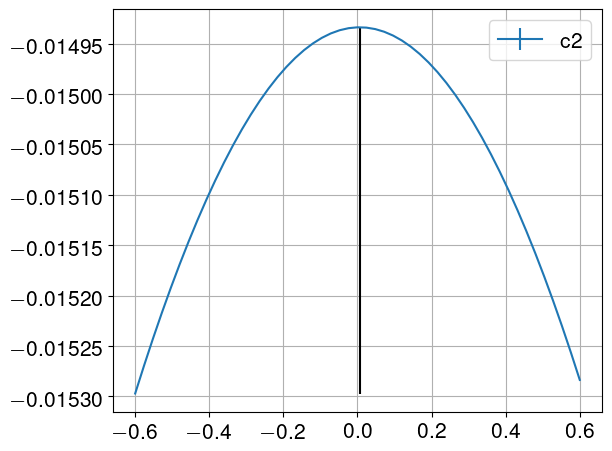

-29.93495696281835
c3 == 0 @ -29.93495696281835


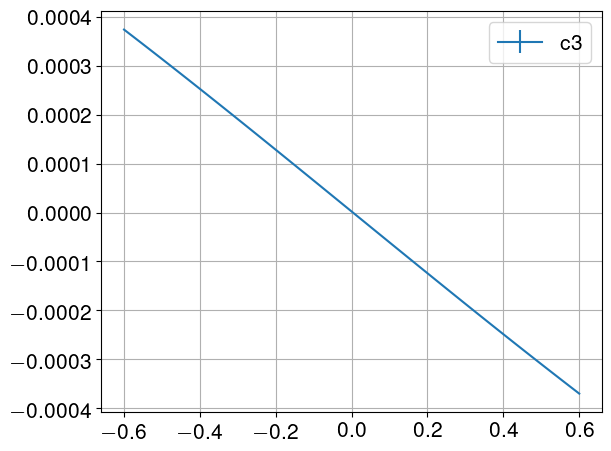

-2.5995540948974476
c4 == 0 @ -2.5995540948974476


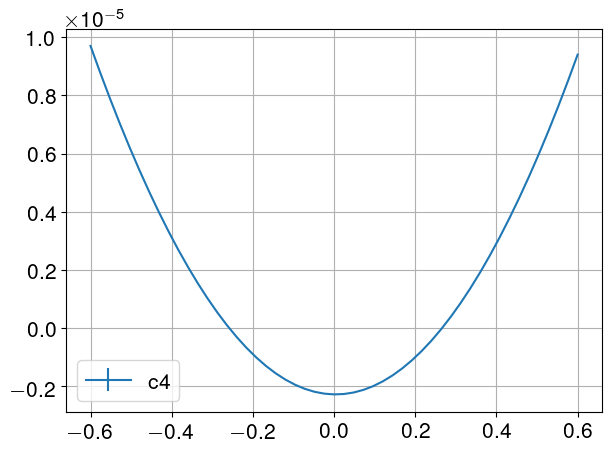

-1.8506938905539032
c5 == 0 @ -1.8506938905539032


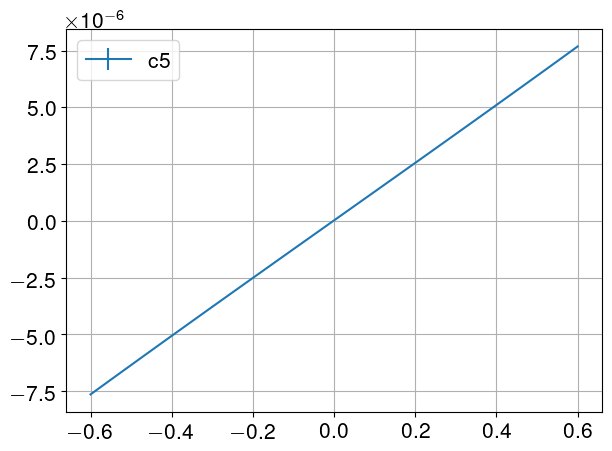

0.010361322805305358
c6 == 0 @ 0.010361322805305358


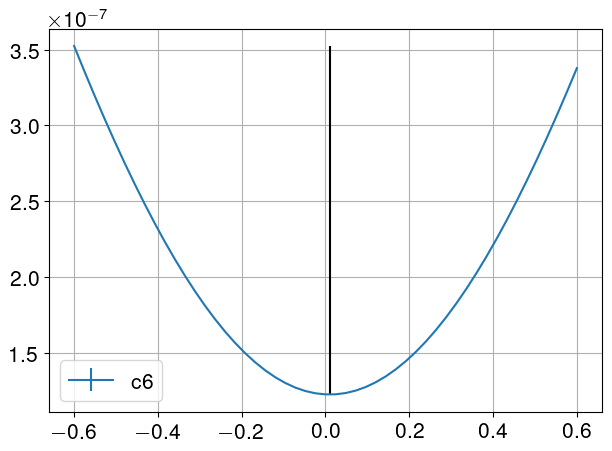

0.010361322805305358

In [114]:
plotci_poly10(1)
plotci_poly10(2)
plotci_poly10(3)
plotci_poly10(4)
plotci_poly10(5)
plotci_poly10(6)

## check if position changes with depth

In [ ]:
xminpos = []
xminposperU = []
c1s = []
q1 = 48
qrange = range(q1, q1-10, -1)

for idx, q in enumerate(qrange):
    ion = "176Yb"+str(q)+"+"
    A, q, m, dm, U = getU(ion)
    print(U)
    trap_settings = original_trap_settings
    
    #ion22 = "176Yb"+str(44+(-1)**(idx%2))+"+"
    #A22, q22, m22, dm22, U22 = getU(ion22)
        
    trap_settings = addoffsets(trap=trapnr, asym=0, offsets=[0,0,0,0,0])
    
    trap_settings[trapnr]['U0'] = U
    
    #trap_settings[trapnr-1]['U0'] = U22
    #trap_settings[trapnr+1]['U0'] = U22
    #pprint(trap_settings)
    
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    c1 = popt[-2]
    c1s.append(c1)
    xminpos.append(xmina)
    xminposperU.append(xmina/U)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3,3))
plt.plot(qrange, c1s, "o-", label="c1")
#plt.legend()
plt.grid(which="both")
plt.xticks([40, 42, 44, 46, 48])
plt.xlabel('q (1)')
plt.ylabel(r'$c_1$ (1/\text{mm})')
plt.show()
    
plt.plot(qrange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(qrange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/q [nm/e]', popt[0]*1e6)
print('dnuc/nuc/q [1/e]', popt[0]*1.5e-6/7)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(qrange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

In [ ]:
xminpos = []
xminposperU = []
c1s = []
c2s = []
c3s = []
c4s = []
c6s = []
qrange = range(q1, q1-10, -1)

for idx, q in enumerate(qrange):
    ion = "172Yb"+str(q)+"+"
    A, q, m, dm, U = getU(ion)
    print(U)
    trap_settings = original_trap_settings
    
    #ion22 = "176Yb"+str(44+(-1)**(idx%2))+"+"
    #A22, q22, m22, dm22, U22 = getU(ion22)
        
    trap_settings = addoffsets(trap=trapnr, asym=0, offsets=[0,0,0,0,0])
    
    trap_settings[trapnr]['U0'] = U
    
    #trap_settings[trapnr-1]['U0'] = U22
    #trap_settings[trapnr+1]['U0'] = U22
    #pprint(trap_settings)
    
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    c1 = popt[-2]
    xminpos.append(xmina)
    xminposperU.append(xmina/U)
    xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings, trapnr, order=fitorder, full=True)
    c2 = popt[-3]
    c3 = popt[-4]
    c4 = popt[-5]
    c6 = popt[-7]
    c1s.append(c1)
    c2s.append(c2)
    c3s.append(c3)
    c4s.append(c4)
    c6s.append(c6)

#for cname, cs in zip(['z','1','2','3','4','6'],[xminpos, c1s,c2s,c3s,c4s,c6s]):

#fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3))
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(3,12), sharex=True)
for i, cname, cs in zip([0,1,2,3],['z','1','2','3'],[xminpos, c1s,c2s,c3s,c4s,c6s]):
    #plt.figure(figsize=(3,3))
    if cname == '2' or cname == 'z':
        cs = np.asarray(cs) - cs[-1]
    axs[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axs[i].plot(qrange, cs, "o", label=cname, alpha=0.6)
    #plt.legend()
    axs[i].grid(which="both")
    axs[i].set_xticks([40, 42, 44, 46, 48])
    axs[i].set_xlabel(r'$q \, (1)$')
    if cname == '1':
        axs[i].set_ylabel(r'$c_'+cname+'\, (1/\\text{mm})$')
    elif cname == '2':
        axs[i].set_ylabel(r'$\delta c_'+cname+'\, (1/\\text{mm}^{'+cname+'})$')
    elif cname == 'z':
        axs[i].set_ylabel(r'$\delta z\, (\text{mm})$')
    else:
        axs[i].set_ylabel(r'$c_'+cname+'\, (1/\\text{mm}^{'+cname+'})$')
plt.savefig('c'+cname+'.pdf')
plt.show()

plt.plot(qrange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(qrange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/q [nm/e]', popt[0]*1e6)
print('dnuc/nuc/q [1/e]', popt[0]*1.5e-6/7)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(qrange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

In [ ]:
xminpos = []
xminposperU = []
c1s = []
Urange = []
ions = [
    "176Yb44+",
    "174Yb44+",
    "172Yb44+",
    "170Yb44+",
    "168Yb44+",
]
print(ions)
print(fitorder)
for ion in ions:
    A, q, m, dm, U = getU(ion)
    Urange.append(U)
    
    trap_settings = addoffsets(trap=trapnr, asym=0, offsets=[0,0,0,0,0])
    trap_settings[trapnr]['U0'] = U
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=15, full=True)
    c1 = popt[-2]
    c1s.append(c1)
    xminpos.append(xmina)
    xminposperU.append(xmina/U)
    
c1s = np.asarray(c1s)

plt.plot(Urange, c1s, "o-", label="c1")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, -c1s/c2/2, "o-", label="c1/(2c2)")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(Urange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/U [nm/V]', popt[0]*1e6)
print('dnuc/nuc/U [1/V]', popt[0]*1.5e-6/7)
dU = np.mean(np.asarray(Urange[1:]) - np.asarray(Urange[:-1]))
print('pos/ion [nm/;;]', popt[0]*1e6*dU)
print('dnuc/nuc/ion [1/;;]', popt[0]*1.5e-6/7*dU)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(Urange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

## check if position changes with depth, when C3==0 setting is applied

In [ ]:
asym = asymc30
xminpos = []
xminposperU = []
c1s = []
qrange = range(q1, q1-10, -1)

for q in qrange:
    ion = "176Yb"+str(q)+"+"
    A, q, m, dm, U = getU(ion)
    ion22 = "176Yb"+str(q+1)+"+"
    A22, q22, m22, dm22, U22 = getU(ion22)
    
    trap_settings = addoffsets(trap=trapnr, asym=asym, offsets=[0,0,0,0,0])
    trap_settings[trapnr]['U0'] = U
    trap_settings[trapnr-1]['U0'] = U2
    trap_settings[trapnr+1]['U0'] = U2
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    c1 = popt[-2]
    c1s.append(c1)
    xminpos.append(xmina)
    xminposperU.append(xmina/U)

plt.plot(qrange, c1s, "o-", label="c1")
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(qrange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(qrange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/q [nm/e]', popt[0]*1e6)
print('dnuc/nuc/q [1/e]', popt[0]*1.5e-6/7)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(qrange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

In [ ]:
xminpos = []
xminposperU = []
c1s = []
c2s = []
c3s = []
c4s = []
Urange = []
ions = [
    "176Yb44+",
    "174Yb44+",
    "172Yb44+",
    "170Yb44+",
    "168Yb44+",
]
print(ions)
this_trap_settings = deepcopy(trap_settings)

for ion in ions:
    A, q, m, dm, U = getU(ion)
    Urange.append(U)
    this_trap_settings[trapnr]['U0'] = U
    #this_trap_settings = addoffsets(trap=trapnr, asym=asym, offsets=[0.0,0,0,0,0])
    this_trap_settings[trapnr]['Offset'] = [0.1,0,0,0,0]
    this_trap_settings[trapnr]['TR'] = 0.8800 + 0.645e-3
    pprint(this_trap_settings[trapnr])
    xmina, popt, perr = tt.trapsettings2fitminimum(this_trap_settings, trapnr, order=fitorder, full=True)
    c1s.append(popt[-2]) # -1 is c0, noone cares about him
    c2s.append(popt[-3])
    c3s.append(popt[-4])
    c4s.append(popt[-5])
    xminpos.append(xmina)
    xminposperU.append(xmina/U)

c1s = np.asarray(c1s)
c2s = np.asarray(c2s)
c3s = np.asarray(c3s)
c4s = np.asarray(c4s)
    
plt.plot(Urange, c1s, "o-", label="c1")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, c2s, "o-", label="c2")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, c3s, "o-", label="c3")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, c4s, "o-", label="c4")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, c3s/c1s, "o-", label="c3/c1")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, c4s/c2s, "o-", label="c4/c2")
plt.legend()
plt.grid(which="both")
plt.show()

plt.plot(Urange, c3s**2/c2s**2, "o-", label="c3**2/c2**2")
plt.legend()
plt.grid(which="both")
plt.show()


plt.plot(Urange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(Urange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/U [nm/V]', popt[0]*1e6)
print('dnuc/nuc/U [1/V]', popt[0]*1.5e-6/7)
dU = np.mean(np.asarray(Urange[1:]) - np.asarray(Urange[:-1]))
print('pos/ion [nm/;;]', popt[0]*1e6*dU)
print('dnuc/nuc/ion [1/;;]', popt[0]*1.5e-6/7*dU)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(Urange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

## check if position changes with depth, when C3==0 setting is found for each U0 and applied

In [ ]:
asym = -0.012609849076201333
xminpos = []
xminposperU = []
qrange = range(q1, q1-10, -1)

for q in qrange:
    ion = "176Yb"+str(q)+"+"
    A, q, m, dm, U = getU(ion)
    trap_settings[trapnr]['U0'] = U

    asym2 = np.around(findasym(c=3, plot=False), 6)    
    print(asym2)
    
    trap_settings = addoffsets(trap=trapnr, asym=asym2, offsets=[0,0,0,0,0])
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    xminpos.append(xmina)
    xminposperU.append(xmina/U)
    
plt.plot(qrange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(qrange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/q [nm/e]', popt[0]*1e6)
print('dnuc/nuc/q [1/e]', popt[0]*1.5e-6/7)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(qrange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

In [ ]:
xminpos = []
xminposperU = []
c1s = []
Urange = []
ions = [
    "176Yb44+",
    "174Yb44+",
    "172Yb44+",
    "170Yb44+",
    "168Yb44+",
]
print(ions)

for ion in ions:
    A, q, m, dm, U = getU(ion)
    Urange.append(U)
    trap_settings[trapnr]['U0'] = U

    asym2 = np.around(findasym(c=3, plot=False), 6)    
    print(asym2)
    
    trap_settings = addoffsets(trap=trapnr, asym=asym2, offsets=[0,0,0,0,0])
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
    c1 = popt[-2]
    c1s.append(c1)
    xminpos.append(xmina)
    xminposperU.append(xmina/U)

plt.plot(Urange, c1s, "o-", label="c1")
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(Urange, xminpos, "o-", label="minpos")
popt, pcov = np.polyfit(Urange, xminpos, 1, rcond=None, full=False, w=None, cov=True)
perr = np.sqrt(np.diag(pcov))
print('pos/U [nm/V]', popt[0]*1e6)
print('dnuc/nuc/U [1/V]', popt[0]*1.5e-6/7)
dU = np.mean(np.asarray(Urange[1:]) - np.asarray(Urange[:-1]))
print('pos/ion [nm/;;]', popt[0]*1e6*dU)
print('dnuc/nuc/ion [1/;;]', popt[0]*1.5e-6/7*dU)
plt.legend()
plt.grid(which="both")
plt.show()
    
plt.plot(Urange, xminposperU, "o-", label="minpos/U")
plt.legend()
plt.grid(which="both")
plt.show()

# check symmetrisation with EC

In [ ]:
def findasymEC(c=3, plot=False, current_offsets=None):
    global popts, perrs
    
    for i, asym in enumerate(Uasym):
        trap_settings = addoffsets(trap=trapnr, asymEC=asym, offsets=[0,0,0,0,0], currentOffs=current_offsets)
        #pprint(trap_settings)
        xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
        xmins.append(xmina)
        popts[i] = popt
        perrs[i] = perr

    return plotci(c, plot=plot)

asymc30 = findasym(3)
print('asym CE', asymc30)
trap_settings = addoffsets(trap=trapnr, asym=asymc30, offsets=[0,0,0,0,0])
print(trap_settings[trapnr])
cur_offsets = deepcopy(trap_settings[trapnr]['Offset'])
asymEC = findasymEC(3, current_offsets=cur_offsets)
print('asym EC', asymEC)
cur_offsets[0] += asymEC
cur_offsets[-1] -= asymEC
trap_settings = addoffsets(trap=trapnr, asym=None, offsets=cur_offsets)
print(trap_settings[trapnr])
xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
c1 = popt[-2]
c3 = popt[-4]
print("xmin new, old, diff", xmina, originalxmin, xmina-originalxmin)
print("c1 new, old, diff", c1, originalc1, c1-originalc1)
print("c3 new, old, diff", c3, originalc3, c3-originalc3)
pprint(popt)
pprint(perr)

## Asymmetry compensation like Ulmer

In [ ]:
from scipy.optimize import minimize
counter = 0

In [ ]:
def minimizeme(Ub, Ua=0.02, idxa=1, idxb=3, nu_z=501e3, current_offsets=deepcopy( trap_settings[trapnr]['Offset'] ) ):
    global counter#, Ubglob, reglob
    #Ubglob.append(Ub)
    counter += 1
    #print(counter)
    new_offsets = deepcopy(current_offsets)
    new_offsets[idxa] += Ua
    new_offsets[idxb] += Ub
    trap_settings[trapnr]['Offset'] = new_offsets
    #pprint(trap_settings[trapnr])
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=10, full=True)
    #print('i min', xmina, 'i c3', popt[-4])
    #print("poptI", popt)
    #print("nu_z", nu_z)
    domegazI = systematics.domegaz_c3(ampz=11e-3, omegaz=nu_z*2*np.pi, c3=popt[-4], c2=popt[-3])
    c3I = deepcopy(popt[-4])
    #print("domegazI", domegazI)

    new_offsets = deepcopy(current_offsets)
    new_offsets[idxa] -= Ua
    new_offsets[idxb] += Ub
    trap_settings[trapnr]['Offset'] = new_offsets
    #pprint(trap_settings[trapnr])
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=10, full=True)
    #print('j min', xmina, 'j c3', popt[-4])
    domegazJ = systematics.domegaz_c3(ampz=11e-3, omegaz=nu_z*2*np.pi, c3=popt[-4], c2=popt[-3])
    c3J = popt[-4]
    
    #print(domegazI, domegazJ)
    #return abs(domegazI - domegazJ)
    #print('Ub', Ub, 'diff c3', abs(c3I - c3J))
    re = abs(c3I**2 - c3J**2)*1e12
    #re = (c3I - c3J)*1e6
    #reglob.append(re)
    return re


def optimizeit(idx_opt, idx_scan):
    global these_offsets
    
    method = 'Nelder-Mead'
    method = None
    p0 = 0.005
    args = (0.1, idx_opt, idx_scan, 501e3, these_offsets)
    tol = 1e-9
    xatol = 1e-6
    fatol = 1e-9

    return minimize(minimizeme, 0.2, args=args, method=method, tol = tol).x[0]

In [ ]:
# UCE using LCE

these_offsets = deepcopy( original_offsets )

def checkmethod(it=1, wi=3):
    Urange = np.arange(-0.1, 0.1, 1e-3)
    reglob = []
    for u in Urange:
        reglob.append(minimizeme(u, 0.1, it, wi, 501e3, these_offsets))
    plt.plot(Urange, reglob)
    plt.show()

checkmethod(1, 3)

In [ ]:
these_offsets = deepcopy( original_offsets )

pprint(these_offsets)
offUCE = optimizeit(1, 3)
these_offsets[1] -= offUCE
print(counter, offUCE)
counter = 0
pprint(these_offsets)

checkmethod(1, 3)

In [ ]:

offLCE = optimizeit(3, 1)
these_offsets[3] -= offLCE
print(counter, offLCE)
counter = 0
pprint(these_offsets)
checkmethod(3,1)

offLEC = optimizeit(4, 0)
these_offsets[4] -= offLEC
print(counter, offLEC)
counter = 0
pprint(these_offsets)
offR = optimizeit(2, 4)
these_offsets[2] -= offR
print(counter, offR)
counter = 0
pprint(these_offsets)
xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
print(xmina)
c1 = popt[-2]
c3 = popt[-4]
print("xmin new, old, diff", xmina, originalxmin, xmina-originalxmin)
print("c1 new, old, diff", c1, originalc1, c1-originalc1)
print("c3 new, old, diff", c3, originalc3, c3-originalc3)
pprint(popt)
pprint(perr)

In [ ]:
plotci(1)
plotci(2)
plotci(3)
plotci(4)
plotci(5)
plotci(6)

# Neon C1 estimation by machine tolerances

In [ ]:
import copy
from functools import partial
from scipy.optimize import minimize

In [ ]:

trap_settings_Ne1 = {
    1: {   'U0': -6.91718,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    2: {   'U0': -14.89699,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    3: {   'U0': -6.91718,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    4: {   'U0': -14.89699,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    5: {   'U0': -6.91718,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]}
}

trap_settings_Ne2 = {
    1: {   'U0': -6.91459,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    2: {   'U0': -14.9026,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    3: {   'U0': -6.91459,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    4: {   'U0': -14.9026,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    5: {   'U0': -6.91459,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]}
}

In [ ]:
def c3_asym(tower, trap_settings_original, trapnr, asym):
    # define asym range and make a copy of the original trap_settings
    trap_settings = copy.deepcopy(trap_settings_original)

    # add the asym params
    trap_settings[trapnr]['Offset'][1] = trap_settings_original[trapnr]['Offset'][1] + asym
    trap_settings[trapnr]['Offset'][3] = trap_settings_original[trapnr]['Offset'][3] - asym
        
    # fit
    xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=20, full=True)
    #print(10, popt, popt[-4])
    return popt[-4]

In [ ]:
machining_precision = 5e-6 # None #
fitorder = 33
patch_range = 0.060 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.020 # corresponding to Trap3 neon/carbon measurement
patch_range = 0.060 # corresponding to Trap3 neon/carbon measurement
usym_span = np.arange(-100, 100, 5)*1e-3

offset_storage = copy.deepcopy(trap_settings_Ne1)

np.random.seed(2342)

seeds = np.random.randint(1000, size=100)
z =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c1 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c2 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c3l = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym_c1 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]

for i, seed in enumerate(seeds):
    np.random.seed(seed)
    print(np.around(i/len(seeds)*100, 3), end='% \r')
    # random patch potentials
    for th, ts in offset_storage.items():
        ts['Offset'] = np.around((np.random.rand(5)-0.5)*patch_range, 4)
        
    # random tower geometry by machining precision
    dr = np.around((np.random.rand(1)-0.5)*machining_precision, 7)
    tt = displacement.trap_tower(radius=5e-3 + dr, gap=0.15e-3, electrode_lengths=None, order = 200, 
                                 machining_precision = machining_precision, random_seed=seed)

    for t_idx, trapnr in enumerate([2, 3]):
        for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
            for trap, data in offset_storage.items():
                trap_settings[trap]["Offset"] = data["Offset"]
                
            # find the minimum position of the given settings
            xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
            #print(popt)
            c1here = popt[-2]
            c1[t_idx][pos_idx].append(c1here)
            c2here = popt[-3]
            c2[t_idx][pos_idx].append(c2here)
            z[t_idx][pos_idx].append(xmina)
            c3here = popt[-4]
            c3l[t_idx][pos_idx].append(c3here)
            
            mini_func = partial(c3_asym, tt, trap_settings, trapnr)
            c3 = []
            for asym in usym_span:
                c3.append(mini_func(asym))
            polypopt = np.polyfit(usym_span, c3, 1) # y = ax + b -> 0 at x = -b/a
            usymzeroc3 = -polypopt[1]/polypopt[0]
            usym[t_idx][pos_idx].append(usymzeroc3)


In [ ]:
from uncertainties import ufloat
dz_results = {}

for t_idx, trapnr in enumerate([2, 3]):
    for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
        print("trap, pos", trapnr, pos_idx+1)
        c1_data = c1[t_idx][pos_idx]
        c2_data = c2[t_idx][pos_idx]
        c3_data = c3l[t_idx][pos_idx]
        #plt.plot(c1_data)
        print("c1 mean std", np.mean(c1_data), np.std(c1_data))
        print("c2 mean std", np.mean(c2_data), np.std(c2_data))
        print("c3 mean std", np.mean(c3_data), np.std(c3_data))
        #plt.show()
        z_data = z[t_idx][pos_idx]
        #plt.plot(z_data)
        print("z (mm) mean std", np.mean(z_data), np.std(z_data))
        #plt.show()
        
        usym_data = usym[t_idx][pos_idx]
        print("usym (V) mean std", np.mean(usym_data), np.std(usym_data))
        plt.hist(usym_data)
        plt.show()
        
        plt.scatter(c1_data, c3_data)
        plt.show()
        
    dz_data = np.asarray(z[t_idx][0]) - np.asarray(z[t_idx][1])
    dz_results[trapnr] = ufloat(np.mean(dz_data), np.std(dz_data))
    plt.plot(dz_data)
    print("dz (mm) mean std", np.mean(dz_data), np.std(dz_data))
    plt.show()
    
    dusym_data = np.asarray(usym[t_idx][0]) - np.asarray(usym[t_idx][1])
    plt.plot(dusym_data, dz_data)
    print("dz (mm) mean std", np.mean(dz_data), np.std(dz_data))
    plt.show()

In [ ]:
B1 = {
    2: ufloat(1.41, 0.27)*1e-3,
    3: ufloat(-1.49, 0.16)*1e-3
}
# Usym trap2 13.5 mV, trap3 4.3 mV

for trap, dz in dz_results.items():
    if trap==2:continue
    print('B1', B1[trap], 'dz', dz, "dR", trap, B1[trap]*dz/1000/7)
    
# trap 2 4e-12 with 0.08 patch potentials resulting in +-15.4 mV Usym
# trap 3 2.2e-12 with 0.02 patch potentials resulting in +-5.3 mV Usym

In [ ]:
B1 = {
    2: ufloat(1.41, 0.27)*1e-3,
    3: ufloat(-1.49, 0.16)*1e-3
}
# Usym trap2 13.5 mV, trap3 4.3 mV

for trap, dz in dz_results.items():
    print('B1', B1[trap], 'dz', dz, "dR", trap, B1[trap]*dz/1000/7)
    
# trap 2 4e-12 with 0.08 patch potentials resulting in +-15.4 mV Usym

In [ ]:
B1 = {
    2: ufloat(1.41, 0.27)*1e-3,
    3: ufloat(-1.49, 0.16)*1e-3
}
# Usym trap2 13.5 mV, trap3 4.3 mV

for trap, dz in dz_results.items():
    print('B1', B1[trap], 'dz', dz, "dR", trap, B1[trap]*dz/1000/7)

# 

In [ ]:
machining_precision = 10e-6 # None #
fitorder = 15
patch_range = 0.060 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.020 # corresponding to Trap3 neon/carbon measurement
patch_range = 0.130 # corresponding to Trap3 neon/carbon measurement
usym_span = np.arange(-100, 100, 5)*1e-3

offset_storage = copy.deepcopy(trap_settings_Ne1)

np.random.seed(3134)

seeds = np.random.randint(1000, size=50)
z =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c1 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c2 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c3l = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym_c1 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]

for i, seed in enumerate(seeds):
    np.random.seed(seed)
    print(np.around(i/len(seeds)*100, 3), end='% \r')
    # random patch potentials
    for th, ts in offset_storage.items():
        ts['Offset'] = np.around((np.random.rand(5)-0.5)*patch_range, 4)
        
    # random tower geometry by machining precision
    dr = np.around((np.random.rand(1)-0.5)*machining_precision, 7)
    tt = displacement.trap_tower(radius=5e-3 + dr, gap=0.15e-3, electrode_lengths=None, order = 200, 
                                 machining_precision = machining_precision, random_seed=seed)

    for t_idx, trapnr in enumerate([2, 3]):
        for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
            for trap, data in offset_storage.items():
                trap_settings[trap]["Offset"] = data["Offset"]
                
            # find the minimum position of the given settings
            xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
            #print(popt)
            c1here = popt[-2]
            c1[t_idx][pos_idx].append(c1here)
            c2here = popt[-3]
            c2[t_idx][pos_idx].append(c2here)
            z[t_idx][pos_idx].append(xmina)
            c3here = popt[-4]
            c3l[t_idx][pos_idx].append(c3here)
            
            mini_func = partial(c3_asym, tt, trap_settings, trapnr)
            c3 = []
            for asym in usym_span:
                c3.append(mini_func(asym))
            polypopt = np.polyfit(usym_span, c3, 1) # y = ax + b -> 0 at x = -b/a
            usymzeroc3 = -polypopt[1]/polypopt[0]
            usym[t_idx][pos_idx].append(usymzeroc3)


In [ ]:
from uncertainties import ufloat
dz_results = {}

for t_idx, trapnr in enumerate([2, 3]):
    for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
        print("trap, pos", trapnr, pos_idx+1)
        c1_data = c1[t_idx][pos_idx]
        c2_data = c2[t_idx][pos_idx]
        c3_data = c3l[t_idx][pos_idx]
        #plt.plot(c1_data)
        print("c1 mean std", np.mean(c1_data), np.std(c1_data))
        print("c2 mean std", np.mean(c2_data), np.std(c2_data))
        print("c3 mean std", np.mean(c3_data), np.std(c3_data))
        #plt.show()
        z_data = z[t_idx][pos_idx]
        #plt.plot(z_data)
        print("z (mm) mean std", np.mean(z_data), np.std(z_data))
        #plt.show()
        
        usym_data = usym[t_idx][pos_idx]
        print("usym (V) mean std", np.mean(usym_data), np.std(usym_data))
        plt.hist(usym_data)
        plt.show()
        
    dz_data = np.asarray(z[t_idx][0]) - np.asarray(z[t_idx][1])
    dz_results[trapnr] = ufloat(np.mean(dz_data), np.std(dz_data))
    plt.plot(dz_data)
    print("dz (mm) mean std", np.mean(dz_data), np.std(dz_data))
    plt.show()
    
    dusym_data = np.asarray(usym[t_idx][0]) - np.asarray(usym[t_idx][1])
    plt.plot(dusym_data, dz_data)
    print("dz (mm) mean std", np.mean(dz_data), np.std(dz_data))
    plt.show()

In [ ]:

for trap, dz in dz_results.items():
    if trap==3:continue
    print('B1', B1[trap], 'dz', dz, "dR", trap, B1[trap]*dz/1000/7)

# simulating the correlation between c1 and c3

In [ ]:
machining_precision = 10e-6 # None #
fitorder = 30
patch_range = 0.060 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.020 # corresponding to Trap3 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap3 neon/carbon measurement

offset_storage = copy.deepcopy(trap_settings_Ne1)

np.random.seed(3134)

seeds = np.random.randint(1000, size=10)
z =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c1 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c2 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
c3l = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym_c1 = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]

for i, seed in enumerate(seeds):
    np.random.seed(seed)
    print(np.around(i/len(seeds)*100, 3), end='% \r')
    # random patch potentials
    for th, ts in offset_storage.items():
        ts['Offset'] = np.around((np.random.rand(5)-0.5)*patch_range, 4)
        
    # random tower geometry by machining precision
    dr = np.around((np.random.rand(1)-0.5)*machining_precision, 7)
    tt = displacement.trap_tower(radius=5e-3 + dr, gap=0.15e-3, electrode_lengths=None, order = 200, 
                                 machining_precision = machining_precision, random_seed=seed)

    for t_idx, trapnr in enumerate([2, 3]):
        for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
            for trap, data in offset_storage.items():
                trap_settings[trap]["Offset"] = data["Offset"]
                
            # find the minimum position of the given settings
            xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
            #print(popt)
            c1here = popt[-2]
            c1[t_idx][pos_idx].append(c1here)
            c2here = popt[-3]
            c2[t_idx][pos_idx].append(c2here)
            z[t_idx][pos_idx].append(xmina)
            c3here = popt[-4]
            c3l[t_idx][pos_idx].append(c3here)
            
            mini_func = partial(c3_asym, tt, trap_settings, trapnr)
            c3 = []
            for asym in usym_span:
                c3.append(mini_func(asym))
            polypopt = np.polyfit(usym_span, c3, 1) # y = ax + b -> 0 at x = -b/a
            usymzeroc3 = -polypopt[1]/polypopt[0]
            usym[t_idx][pos_idx].append(usymzeroc3)



In [ ]:

for t_idx, trapnr in enumerate([2, 3]):
    for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
        print("trap, pos", trapnr, pos_idx+1)
        c1_data = c1[t_idx][pos_idx]
        c2_data = c2[t_idx][pos_idx]
        c3_data = c3l[t_idx][pos_idx]
        print("c1 mean std", np.mean(c1_data), np.std(c1_data))
        print("c2 mean std", np.mean(c2_data), np.std(c2_data))
        print("c3 mean std", np.mean(c3_data), np.std(c3_data))
        plt.plot(c1_data, c3_data, ".", lw=0)
        plt.xlabel("c1")
        plt.ylabel("c3")
        plt.title("trap/pos: " + str(trapnr)+"/"+str(pos_idx))
        plt.show()
        c1s = np.asarray(c1_data)
        c2s = np.asarray(c2_data)
        c3s = np.asarray(c3_data)
        dz1 = -c1s/2/c2s
        dz3z = -3/4*c3s/2/c2s*20e-3**2
        dz3p = 3/4*c3s/2/c2s*15e-3**2
        plt.plot(c1s, dz1, ".", lw=0)
        plt.ylabel("z1")
        plt.title("trap/pos: " + str(trapnr)+"/"+str(pos_idx))
        plt.show()
        plt.plot(c3s, dz3z, ".", lw=0)
        plt.plot(c3s, dz3p, ".", lw=0)
        plt.ylabel("z3")
        plt.title("trap/pos: " + str(trapnr)+"/"+str(pos_idx))
        plt.show()
        z_data = z[t_idx][pos_idx]
        #plt.plot(z_data)
        print("z (mm) mean std", np.mean(z_data), np.std(z_data))
        #plt.show()
        
        usym_data = usym[t_idx][pos_idx]
        print("usym (V) mean std", np.mean(usym_data), np.std(usym_data))

        
    dz_data = np.asarray(z[t_idx][0]) - np.asarray(z[t_idx][1])
    dz_results[trapnr] = ufloat(np.mean(dz_data), np.std(dz_data))
    plt.plot(dz_data)
    print("dz (mm) mean std", np.mean(dz_data), np.std(dz_data))
    plt.show()

In [209]:
def popt_asym(tower, trap_settings_original, trapnr, at_minimum, asym):
    # define asym range and make a copy of the original trap_settings
    trap_settings = copy.deepcopy(trap_settings_original)

    # add the asym params
    trap_settings[trapnr]['Offset'][1] = trap_settings_original[trapnr]['Offset'][1] + asym
    trap_settings[trapnr]['Offset'][3] = trap_settings_original[trapnr]['Offset'][3] - asym
    # fit
    if at_minimum:
        xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings, trapnr, order=10, full=True)
    else:
        xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=10, full=True)
        #pprint(trap_settings)

    #print(10, popt, popt[-4])
    return xmina, popt, perr

In [210]:
# confidance band calculation stuff

# error propgation formula sigma_y^2 = A^T U A 
def sigma_y_fit(x, pcov = np.zeros((2,2)), order = 2):
    j = []
    for i in range(order+1):
        j.append(x**i)
    #print(j)
    
    J = np.asarray(j)[::-1] # feature vector
    #print(J)
    
    return np.sqrt(np.transpose(J).dot(pcov.dot(J)))

# vectorized version so that numpy array can be used as argument 
v_sigma_y_fit = np.vectorize(sigma_y_fit, excluded=['pcov', 'order'])

In [ ]:
machining_precision = 10e-6 # None #
fitorder = 33
patch_range = 0.060 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.020 # corresponding to Trap3 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap3 neon/carbon measurement
usym_span = np.arange(-10, 10, 2)*1e-3

offset_storage = copy.deepcopy(trap_settings_Ne1)

np.random.seed(3134)

seeds = np.random.randint(10000, size=100)
plt.hist(seeds)
plt.show()
z =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
zsym =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]

design_trap = displacement.trap_tower(radius=5e-3, gap=0.15e-3, electrode_lengths=None, order = fitorder, 
                                 machining_precision = None, random_seed=None)

for i, seed in enumerate(seeds):
    # progress
    print(np.around(i/len(seeds)*100, 3), '% \t', seed, end='\r')
    
    # set numpy random seed
    np.random.seed(seed)
    # random patch potential (this seed, this patch pot set)
    for th, ts in offset_storage.items():
        ts['Offset'] = np.around((np.random.rand(5)-0.5)*patch_range, 4) # 4 offset values 
        
    # random tower geometry by machining precision
    dr = np.around((np.random.rand(1)-0.5)*machining_precision, 9)
    tt = displacement.trap_tower(radius=5e-3 + dr, gap=0.15e-3, electrode_lengths=None, order = fitorder, 
                                 machining_precision = machining_precision, random_seed=seed)
    #print(dr, tt.electrode_lenghts)
    #print(np.random.rand(15))
    
    for t_idx, trapnr in enumerate([2, 3]):
        for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
            for trap, data in offset_storage.items():
                trap_settings[trap]["Offset"] = data["Offset"]
            
            #pprint(trap_settings)
            # find the minimum position of the given settings
            xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
            #print(popt)
            #print(xmina)
            z[t_idx][pos_idx].append(xmina)
            
            popt_this = partial(popt_asym, tt, trap_settings, trapnr, True)
            c3 = []
            c2 = []
            for asym in usym_span:
                xmina, popt, perr = popt_this(asym)
                c2.append(popt[-3])
                c3.append(popt[-4])
            c3 = np.asarray(c3)
            c2 = np.asarray(c2)
            polypopt = np.polyfit(usym_span, c3, 1) # y = ax + b -> 0 at x = -b/a
            usymzeroc3 = -polypopt[1]/polypopt[0]
            #polypopt = np.polyfit(usym_span, c3**2/c2**2, 8) # y = ax + b -> 0 at x = -b/a
            #usymzeroc3 = np.poly1d(polypopt).deriv().roots[0].real
            #print(usymzeroc3)
            usym[t_idx][pos_idx].append(usymzeroc3)

            for tr in trap_settings.keys():
                trap_settings[tr]["Offset"] = [0,0,0,0,0]
            #pprint(trap_settings)
            popt_that = partial(popt_asym, design_trap, trap_settings, trapnr, False)
            xmina, popt, perr = popt_that(-usymzeroc3)
            #print(xmina)
            zsym[t_idx][pos_idx].append(xmina)


In [ ]:
import math

for t_idx, trapnr in enumerate([2, 3]):
    for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
        print("trap, pos", trapnr, pos_idx+1)
        z_data = z[t_idx][pos_idx]
        print(len(z_data))
        zsym_data = zsym[t_idx][pos_idx]
        
        plt.figure(figsize=(6,6))
        plt.plot(zsym_data, z_data, ".", lw=0, alpha=0.5)
        popt, pcov = np.polyfit(zsym_data, z_data, 1, cov=True)
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        mmax = math.ceil(max([max(z_data), max(zsym_data)])*100)/100
        mmin = math.floor(min([min(z_data), min(zsym_data)])*100)/100
        mmmax = max([mmax, -mmin])
        plt.ylabel("z")
        plt.xlabel("zsym")
        plt.xlim([-mmmax, mmmax])
        plt.ylim([-mmmax, mmmax])
        start, end = plt.xlim()
        tickstep = 0.05
        #tickrange = np.arange(start, end+tickstep, tickstep)
        #plt.xticks(tickrange)
        #plt.yticks(tickrange)
        yfit = np.polyval(popt, tickrange)
        resi = z_data - np.polyval(popt, zsym_data)
        sigma = [np.std(resi)*popt[0]]*len(tickrange)
        plt.plot(tickrange, yfit)
        # fit confidance band stuff
        sigmas = v_sigma_y_fit(tickrange, pcov=pcov, order=1)
        #plt.fill_between(tickrange, yfit - sigmas, yfit + sigmas, color='r', alpha=0.2)
        plt.fill_between(tickrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
        plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
        print(sigma[0])
        plt.title("trap/pos: " + str(trapnr)+"/"+str(pos_idx))
        plt.grid()
        plt.show()

    dz_data = np.asarray(z[t_idx][0]) - np.asarray(z[t_idx][1])
    dzsym_data = np.asarray(zsym[t_idx][0]) - np.asarray(zsym[t_idx][1])
    mmax = math.ceil(max([max(dz_data), max(dzsym_data)])*1e6)*1e-6
    mmin = math.floor(min([min(dz_data), min(dzsym_data)])*1e6)*1e-6
    mmmax = max([mmax, -mmin])
    plt.figure(figsize=(6,6))
    plt.plot(dzsym_data, dz_data, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dzsym_data, dz_data, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("dz")
    plt.xlabel("dzsym")
    plt.xlim([-mmmax, mmmax])
    plt.ylim([-mmmax, mmmax])
    start, end = plt.xlim()
    xrange = np.linspace(start, end, 100)
    yfit = np.polyval(popt, xrange)
    resi = dz_data - np.polyval(popt, dzsym_data)
    sigma = [np.std(resi)*popt[0]]*len(tickrange)
    plt.plot(tickrange, yfit)
    plt.fill_between(tickrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()
    
    dusym_data = np.asarray(usym[t_idx][0]) - np.asarray(usym[t_idx][1])
    deltaR =  B1[trapnr].n*dzsym_data/1000/7
    ddeltaR =  B1[trapnr].s*dzsym_data/1000/7
    print(len(deltaR))
    print(len(ddeltaR))
    plt.figure(figsize=(6,6))
    plt.errorbar(dusym_data, deltaR, yerr=ddeltaR, fmt=".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dusym_data, deltaR, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("deltaR")
    plt.xlabel("dusym")
    #plt.xlim([-mmmax, mmmax])
    start, end = plt.xlim()
    xrange = np.linspace(start, end, 100)
    yfit = np.polyval(popt, xrange)
    resi = deltaR - np.polyval(popt, dusym_data)
    sigma = [np.std(resi)*popt[0]]*len(xrange)
    plt.plot(xrange, yfit)
    plt.fill_between(xrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()

In [ ]:
machining_precision = 5e-6 # None #
fitorder = 33
potential_order = 200
patch_range = 0.060 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.020 # corresponding to Trap3 neon/carbon measurement
patch_range = 0.050 # corresponding to Trap3 neon/carbon measurement
usym_span = np.arange(-20, 20, 2)*1e-3

offset_storage = copy.deepcopy(trap_settings_Ne1)

np.random.seed(3134)

seeds = np.random.randint(10000, size=10)
plt.hist(seeds)
plt.show()
z =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
usym = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
zsym =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]

design_trap = displacement.trap_tower(radius=5e-3, gap=0.15e-3, electrode_lengths=None, order = potential_order, 
                                 machining_precision = None, random_seed=None)

for i, seed in enumerate(seeds):
    # progress
    print(np.around(i/len(seeds)*100, 3), '% \t', seed, end='\r')
    
    # set numpy random seed
    np.random.seed(seed)
    # random patch potential (this seed, this patch pot set)
    for th, ts in offset_storage.items():
        ts['Offset'] = np.around((np.random.rand(5)-0.5)*patch_range, 4) # 4 offset values 
        #print(ts['Offset'])
        
    # random tower geometry by machining precision
    dr = np.around((np.random.rand(1)-0.5)*machining_precision, 9)[0]
    #print(dr)
    tt = displacement.trap_tower(radius=5e-3 + dr, gap=0.15e-3, electrode_lengths=None, order = potential_order, 
                                 machining_precision = machining_precision, random_seed=seed)
    #print(dr, tt.electrode_lenghts)
    #print(np.random.rand(15))
    
    for t_idx, trapnr in enumerate([2, 3]):
        for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
            for trap, data in offset_storage.items():
                trap_settings[trap]["Offset"] = data["Offset"]
            
            #pprint(trap_settings)
            # find the minimum position of the given settings
            xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, order=fitorder, full=True)
            #print(popt)
            #print(xmina)
            z[t_idx][pos_idx].append(xmina)
            
            # fit the field coefficients at the minimum
            popt_this = partial(popt_asym, tt, trap_settings, trapnr, True)
            c3s = []
            c2s = []
            for asym in usym_span:
                xmina, popt, perr = popt_this(asym)
                c2s.append(popt[-3])
                c3s.append(popt[-4])
            c3s = np.asarray(c3s)
            c2s = np.asarray(c2s)
            polypopt = np.polyfit(usym_span, c3s, 1) # y = ax + b -> 0 at x = -b/a
            usymzeroc3 = -polypopt[1]/polypopt[0]
            #polypopt = np.polyfit(usym_span, c3s**2/c2s**2, 2) #
            #p = np.poly1d(polypopt)
            #usymzeroc3 = p.deriv().r[-1]
            #print(usymzeroc3)
            usym[t_idx][pos_idx].append(usymzeroc3)

            for tr in trap_settings.keys():
                trap_settings[tr]["Offset"] = [0,0,0,0,0]
            #pprint(trap_settings)
            # fit the ideal trap with usym applied at trap center to get virtual shift
            popt_that = partial(popt_asym, design_trap, trap_settings, trapnr, False)
            xmina, popt, perr = popt_that(-usymzeroc3)
            #print(xmina)
            zsym[t_idx][pos_idx].append(xmina)


In [ ]:
import math

for t_idx, trapnr in enumerate([2, 3]):
    for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
        print("trap, pos", trapnr, pos_idx+1)
        z_data = z[t_idx][pos_idx]
        print(len(z_data))
        zsym_data = zsym[t_idx][pos_idx]
        
        plt.figure(figsize=(6,6))
        plt.plot(zsym_data, z_data, ".", lw=0, alpha=0.5)
        popt, pcov = np.polyfit(zsym_data, z_data, 1, cov=True)
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        mmax = math.ceil(max([max(z_data), max(zsym_data)])*100)/100
        mmin = math.floor(min([min(z_data), min(zsym_data)])*100)/100
        mmmax = max([mmax, -mmin])
        plt.ylabel("z")
        plt.xlabel("zsym")
        plt.xlim([-mmmax, mmmax])
        plt.ylim([-mmmax, mmmax])
        start, end = plt.xlim()
        #tickrange = np.arange(start, end+0.02, 0.02)
        #plt.xticks(tickrange)
        #plt.yticks(tickrange)
        yfit = np.polyval(popt, tickrange)
        resi = z_data - np.polyval(popt, zsym_data)
        sigma = [np.std(resi)*popt[0]]*len(tickrange)
        plt.plot(tickrange, yfit)
        # fit confidance band stuff
        sigmas = v_sigma_y_fit(tickrange, pcov=pcov, order=1)
        #plt.fill_between(tickrange, yfit - sigmas, yfit + sigmas, color='r', alpha=0.2)
        plt.fill_between(tickrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
        plt.errorbar(0.01, np.polyval(popt, 0.01), sigma[0])
        print(sigma[0])
        plt.title("trap/pos: " + str(trapnr)+"/"+str(pos_idx))
        plt.grid()
        plt.show()

    dz_data = np.asarray(z[t_idx][0]) - np.asarray(z[t_idx][1])
    dzsym_data = np.asarray(zsym[t_idx][0]) - np.asarray(zsym[t_idx][1])
    mmax = math.ceil(max([max(dz_data), max(dzsym_data)])*1e6)*1e-6
    mmin = math.floor(min([min(dz_data), min(dzsym_data)])*1e6)*1e-6
    mmmax = max([mmax, -mmin])
    plt.figure(figsize=(6,6))
    plt.plot(dzsym_data, dz_data, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dzsym_data, dz_data, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("dz")
    plt.xlabel("dzsym")
    plt.xlim([-mmmax, mmmax])
    plt.ylim([-mmmax, mmmax])
    start, end = plt.xlim()
    #tickrange = np.arange(start, end+4e-6, 4e-6)
    #plt.xticks(tickrange)
    #plt.yticks(tickrange)
    yfit = np.polyval(popt, tickrange)
    resi = dz_data - np.polyval(popt, dzsym_data)
    sigma = [np.std(resi)*popt[0]]*len(tickrange)
    plt.plot(tickrange, yfit)
    plt.fill_between(tickrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()

    usym_data = np.asarray(usym[t_idx][0])
    z_data = np.asarray(z[t_idx][0])
    plt.figure(figsize=(6,6))
    plt.plot(usym_data, z_data, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(usym_data, z_data, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("z")
    plt.xlabel("usym")
    start, end = plt.xlim()
    xrange = np.linspace(start, end, 100)
    yfit = np.polyval(popt, xrange)
    resi = dz_data - np.polyval(popt, usym_data)
    sigma = [np.std(resi)*popt[0]]*len(xrange)
    plt.plot(xrange, yfit)
    plt.fill_between(xrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(dusym_data, dz_data, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dusym_data, dz_data, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("dz")
    plt.xlabel("dusym")
    start, end = plt.xlim()
    xrange = np.linspace(start, end, 100)
    yfit = np.polyval(popt, xrange)
    resi = dz_data - np.polyval(popt, dusym_data)
    sigma = [np.std(resi)*popt[0]]*len(xrange)
    plt.plot(xrange, yfit)
    plt.fill_between(xrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()

    deltaR =  B1[trapnr].n*dz_data/1000/7
    ddeltaR =  B1[trapnr].s*dz_data/1000/7
    print(len(deltaR))
    print(len(ddeltaR))
    plt.figure(figsize=(6,6))
    plt.errorbar(dusym_data, deltaR, yerr=ddeltaR, fmt=".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dusym_data, deltaR, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("deltaR")
    plt.xlabel("dusym")
    #plt.xlim([-mmmax, mmmax])
    start, end = plt.xlim()
    xrange = np.linspace(start, end, 100)
    yfit = np.polyval(popt, xrange)
    resi = deltaR - np.polyval(popt, dusym_data)
    sigma = [np.std(resi)*popt[0]]*len(xrange)
    plt.plot(xrange, yfit)
    plt.fill_between(xrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()

In [287]:

trap_settings_Ne1 = {
    1: {   'U0': -6.91718,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    2: {   'U0': -14.89699,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    3: {   'U0': -6.91718,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    4: {   'U0': -14.89699,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    5: {   'U0': -6.91718,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]}
}

trap_settings_Ne2 = {
    1: {   'U0': -6.91459,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    2: {   'U0': -14.9026,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    3: {   'U0': -6.91459,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]},
    4: {   'U0': -14.9026,
          'TR': 0.8788,
          'Offset': [0.0, -0.0]},
    5: {   'U0': -6.91459,
          'TR': 0.8766,
          'Offset': [0.0, -0.0]}
}

In [288]:
print(trap_settings_Ne1)
print(trap_settings_Ne2)

{1: {'U0': -6.91718, 'TR': 0.8766, 'Offset': [0.0, -0.0]}, 2: {'U0': -14.89699, 'TR': 0.8788, 'Offset': [0.0, -0.0]}, 3: {'U0': -6.91718, 'TR': 0.8766, 'Offset': [0.0, -0.0]}, 4: {'U0': -14.89699, 'TR': 0.8788, 'Offset': [0.0, -0.0]}, 5: {'U0': -6.91718, 'TR': 0.8766, 'Offset': [0.0, -0.0]}}
{1: {'U0': -6.91459, 'TR': 0.8766, 'Offset': [0.0, -0.0]}, 2: {'U0': -14.9026, 'TR': 0.8788, 'Offset': [0.0, -0.0]}, 3: {'U0': -6.91459, 'TR': 0.8766, 'Offset': [0.0, -0.0]}, 4: {'U0': -14.9026, 'TR': 0.8788, 'Offset': [0.0, -0.0]}, 5: {'U0': -6.91459, 'TR': 0.8766, 'Offset': [0.0, -0.0]}}


In [290]:
machining_precision = 10e-6 # None # see PhD thesis of J. Repp 2012 
gap_machining_precision = 10e-7 # None #
fitorder = 15
potential_order = 200
fit_span_mm = 0.9
patch_range = 0.060 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.100 # corresponding to Trap2 neon/carbon measurement
patch_range = 0.020 # corresponding to Trap3 neon/carbon measurement
patch_range = 0.1 # corresponding to Trap3 neon/carbon measurement
usym_span = np.arange(-200, 200, 10)*1e-3

offsets_this_tower = deepcopy(trap_settings_Ne1)

np.random.seed(3134)

seeds = np.random.randint(10000, size=500)
#plt.hist(seeds)
#plt.show()
z =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
dz =  [[],[]] # [t2 pos1-pos2], [t3 pos1-pos2]
usym = [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
zsym =  [[[], []], [[], []]] # [t2 pos1, t2 pos2], [t3 pos1, t3 pos2]
dzsym =  [[],[]] # [t2 pos1-pos2], [t3 pos1-pos2]
c3 = [[[], []], [[], []]]

# the ideal trap, no machining errors, no patch potentials
design_tower = displacement.trap_tower(radius=5e-3, gap=0.15e-3, electrode_lengths=None, order = potential_order, 
                                 machining_precision = None, random_seed=None, fit_span_mm=fit_span_mm,
                                      gap_machining_precision=None)
# check 0 positions of the desing tower:
for tr in [2,3,4]:
    print(trap_settings_Ne1)
    xmina, popt, perr = design_tower.trapsettings2fitminimum(trap_settings_Ne1, tr, order=fitorder, full=True)
    print(xmina)

### MONTE CARLO
for i, seed in enumerate(seeds):
 
    ### first we create a random TOWER with the machining precision and random patch potentials
    # set numpy random seed
    np.random.seed(seed)
    # random patch potential (this seed, this patch pot set)
    for th, ts in offsets_this_tower.items():
        ts['Offset'] = np.around((np.random.rand(5)-0.5)*patch_range, 4) # 4 offset values 
        #print(ts['Offset'])
        
    # random tower geometry by machining precision, since the radius has to be fixed for all electrodes, we double
    # the machine error to somehow compensate for this deviation from reality.
    dr = np.around((np.random.rand(1)-0.5)*machining_precision, 9)[0]
    #print(dr)
    tt = displacement.trap_tower(radius=5e-3 + dr, gap=0.15e-3, electrode_lengths=None, order = potential_order, 
                                 machining_precision = machining_precision, random_seed=seed, fit_span_mm=fit_span_mm,
                                      gap_machining_precision=gap_machining_precision)
    #print(dr, tt.electrode_lenghts)
    #print(np.random.rand(15))
    
    # now we try to minimize the C3**2/C2**2 (axial shift) AT THE POTENTIAL MINIMUM!
    # for both traps and ...
    for t_idx, trapnr in enumerate([2, 3]):
        # ...  both positions
        for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
            # due to ^ these trap_settings, we have to reset to offset everytime to the
            # offsets of this(!) tower
            for trap, data in offsets_this_tower.items():
                trap_settings[trap]["Offset"] = data["Offset"]
            
            # fit to find the minimum position of the given settings / this random tower
            xmina_this_tower, popt, perr = tt.trapsettings2fitminimum(trap_settings, trapnr, 
                                                                      order=fitorder, full=True)
            z[t_idx][pos_idx].append(xmina_this_tower)
            _, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings_test, trapnr, 
                                                                      order=fitorder, full=True)
            
            #for i, p in enumerate(popt):
            #    print(i,popt[-i])
            c3[t_idx][pos_idx].append(popt[-4])
            
            # now we check what offset voltage would come out as a minimum in optimization
            c3s = []
            c2s = []
            for asym in usym_span:
                # make a copy of the original trap_settings (patch potentials) of this tower
                trap_settings_test = deepcopy(trap_settings)

                # add the asym voltages to the test trap settings (including this towers patch offsets)
                trap_settings_test[trapnr]['Offset'][1] = trap_settings[trapnr]['Offset'][1] + asym
                trap_settings_test[trapnr]['Offset'][3] = trap_settings[trapnr]['Offset'][3] - asym
                #print(trap_settings_test[trapnr]['Offset'])

                # fit now at the minimum! since we want to get the c3 and c2 from the ions perspective
                xmina, popt, perr = tt.trapsettings2fitminimum_at_minimum(trap_settings_test, trapnr, 
                                                                          order=fitorder, full=True)
                
                if xmina > 1e-9:
                    raise ValueError("the axial displacement is still too high : "+str(xmina))

                #xmina, popt, perr = tt.trapsettings2fitminimum(trap_settings_test, trapnr, order=fitorder, full=True, show=False)
                #print(10, popt, popt[-4])
                #print(popt)
                c2s.append(popt[-3])
                c3s.append(popt[-4])
            
            # fit the C3**2/C2**2 with a polynom, since thats the factor for the axial shift that can be measured
            # it is actually dominated by C3**2, but C2 changes slightly too, so why not include it
            c2s = np.asarray(c2s)
            c3s = np.asarray(c3s)
            #print(c2s, c3s)
            polypopt = np.polyfit(usym_span, np.sqrt(-c2s), 2)
            #print(polypopt)
            p = np.poly1d(polypopt)

            roots = p.deriv().roots
            rroots = roots[np.isreal(roots)]
            minimum_dU = rroots[-1]
            """
            # get minimum
            crit = p.deriv().r # roots of the 1st derivative
            r_crit = crit[crit.imag==0].real # only real roots
            test = p.deriv(2)(r_crit) # evaluate 2nd derivative at roots
            x_minmax = r_crit[test>0] # extrema with positive 2nd derivative are minima
            #print(x_minmax)
            
            # ignore the ones out of the range
            in_range = []
            for j in x_minmax:
                if j > -0.4 and j < 0.5:
                    in_range.append(j)
            try:
                minimum_dU = in_range[-1]
            except:
                minimum_dU = x_minmax[-1]
            """
            #minimum_dU = x_minmax[-1]
            # store the result of the minimization process
            usym[t_idx][pos_idx].append(minimum_dU)

            # now check what a z shift this usym offset would create in an ideal trap
            # reset all offsets to 0
            for tnr in trap_settings.keys():
                trap_settings[tnr]["Offset"] = [0,0,0,0,0]
            # and add the usym offset wich was measured
            trap_settings[trapnr]["Offset"][1] = minimum_dU
            trap_settings[trapnr]["Offset"][3] = -minimum_dU
            
            xmina, popt, perr = design_tower.trapsettings2fitminimum(trap_settings, trapnr, 
                                                                    order=fitorder, full=True)
            zsym[t_idx][pos_idx].append(xmina)
            
            if pos_idx == 0:
                last_xmina_this_tower = xmina_this_tower
                last_xmina = xmina
                last_minimumdU = minimum_dU
            else:
                dz_here = last_xmina_this_tower-xmina_this_tower
                dz[t_idx].append(dz_here)
                dzsym_here = last_xmina-xmina
                dzsym[t_idx].append(dzsym_here)
                
                ddU = last_minimumdU - minimum_dU
                # progress & status
                #print(np.around(i/len(seeds)*100, 3), '% \t', seed, trapnr, ddU, xmina, xmina_this_tower, 
                #       dz_here, dzsym_here, end='\r\n')                
            print(np.around(i/len(seeds)*100, 3), '% \t', seed, trapnr, minimum_dU, xmina, xmina_this_tower)

{1: {'U0': -6.91718, 'TR': 0.8766, 'Offset': array([-0.0253,  0.0253,  0.0201,  0.024 ,  0.0211])}, 2: {'U0': -14.89699, 'TR': 0.8788, 'Offset': array([-0.0217, -0.0415,  0.0414,  0.0059,  0.0303])}, 3: {'U0': -6.91718, 'TR': 0.8766, 'Offset': array([ 0.0491, -0.0297, -0.0275,  0.0091, -0.026 ])}, 4: {'U0': -14.89699, 'TR': 0.8788, 'Offset': array([ 0.0113,  0.0319,  0.0205, -0.0065,  0.0234])}, 5: {'U0': -6.91718, 'TR': 0.8766, 'Offset': array([ 0.0151,  0.0098,  0.0336, -0.0316,  0.0311])}}
-0.013748697700948949
{1: {'U0': -6.91718, 'TR': 0.8766, 'Offset': array([-0.0253,  0.0253,  0.0201,  0.024 ,  0.0211])}, 2: {'U0': -14.89699, 'TR': 0.8788, 'Offset': array([-0.0217, -0.0415,  0.0414,  0.0059,  0.0303])}, 3: {'U0': -6.91718, 'TR': 0.8766, 'Offset': array([ 0.0491, -0.0297, -0.0275,  0.0091, -0.026 ])}, 4: {'U0': -14.89699, 'TR': 0.8788, 'Offset': array([ 0.0113,  0.0319,  0.0205, -0.0065,  0.0234])}, 5: {'U0': -6.91718, 'TR': 0.8766, 'Offset': array([ 0.0151,  0.0098,  0.0336, -0.

4.2 % 	 5209 2 -0.03262478319492236 -0.013480884398598196 0.013078421075581251
4.2 % 	 5209 2 -0.03262568918504761 -0.013476179190725088 0.013073283865890293
4.2 % 	 5209 3 0.010297474643984098 0.009179820247385208 -0.012972522758824906
4.2 % 	 5209 3 0.010297850651483116 0.009183609319827668 -0.01297716930455503
4.4 % 	 9278 2 -0.029974718797145788 -0.012385892804714744 0.024347528010870027
4.4 % 	 9278 2 -0.02997434991707778 -0.012381073574093458 0.024341163373070587
4.4 % 	 9278 3 -0.005375354297406958 -0.004791965348602433 0.01142211196407795
4.4 % 	 9278 3 -0.005375526687529477 -0.004793922010114517 0.011423575752199067
4.6 % 	 3776 2 0.01316471413158195 0.005439888119662512 -0.020679701066729013
4.6 % 	 3776 2 0.013163425686615951 0.005437306166560477 -0.02067738294507549
4.6 % 	 3776 3 -0.023842855239007445 -0.021254111569255683 0.005813879344461109
4.6 % 	 3776 3 -0.02384223334671803 -0.021261552868404095 0.005821535741548073
4.8 % 	 8929 2 0.02459952222527765 0.010164860772419

9.4 % 	 2758 2 -0.009116801217907937 -0.0037672271592177863 -0.0014210074560449559
9.4 % 	 2758 2 -0.009117962821472677 -0.003766287476063815 -0.001421738994940528
9.4 % 	 2758 3 -0.007235122643629113 -0.00644987830682437 0.010349070655133463
9.4 % 	 2758 3 -0.007234553573140576 -0.00645179749768143 0.01035421942819094
9.6 % 	 8714 2 -0.006645335833445886 -0.002745975112757952 -0.028919833023930742
9.6 % 	 8714 2 -0.006645951153230357 -0.002745194589206062 -0.028920296941271312
9.6 % 	 8714 3 -0.016810901851843862 -0.014986054181637494 -0.00568570001723786
9.6 % 	 8714 3 -0.016810599894591678 -0.014991422985257697 -0.005676460059238579
9.8 % 	 389 2 0.016113579447440293 0.006658398829054618 -0.010452504971330632
9.8 % 	 389 2 0.016112542493331633 0.006655461632526266 -0.010449364298202344
9.8 % 	 389 3 0.02338832926851599 0.020848977651354454 -0.02045597890011019
9.8 % 	 389 3 0.02338876469520999 0.02085720934717483 -0.02046288471594898
10.0 % 	 6781 2 -0.008621013774414576 -0.00356235

14.4 % 	 4174 3 -0.007121224218659192 -0.006350730990552361 0.03355574068471705
14.6 % 	 1 2 0.014488715585894757 0.005986984065605608 -0.014936329612299407
14.6 % 	 1 2 0.014489751390479276 0.005985156020722771 -0.01493339764844785
14.6 % 	 1 3 0.009792441552643374 0.008729610075266203 -0.00954035328595578
14.6 % 	 1 3 0.009791986628603085 0.008732488759619366 -0.0095412637493938
14.8 % 	 6657 2 0.008975321400603505 0.0037087653306962743 -0.007915375409669684
14.8 % 	 6657 2 0.008974937213500365 0.0037072091699206135 -0.007915086318452207
14.8 % 	 6657 3 0.0032618961057020142 0.0029078864180336022 -0.015760578852044935
14.8 % 	 6657 3 0.0032620220650783536 0.0029090928131078656 -0.01576382624417912
15.0 % 	 8717 2 0.0077309072403063854 0.0031945522013778756 -0.023767822348671235
15.0 % 	 8717 2 0.007730298574660839 0.0031930970722515756 -0.02376752439282127
15.0 % 	 8717 3 -0.008250398997904983 -0.0073549536084332335 -0.019932034803568595
15.0 % 	 8717 3 -0.008250134830578624 -0.00735

19.6 % 	 5119 3 0.005163454231921926 0.004603063825975249 0.0184427405550088
19.6 % 	 5119 3 0.005163611866423083 0.004604936257100771 0.0184439352745778
19.8 % 	 409 2 0.033531999174171004 0.013855738322439748 -0.03999037229660606
19.8 % 	 409 2 0.033531031224233517 0.013850117882983282 -0.03998322674638932
19.8 % 	 409 3 -0.013145007100217957 -0.011718217753557528 -0.0011257259094989173
19.8 % 	 409 3 -0.013144578555057311 -0.01172224432368496 -0.0011181780936030214
20.0 % 	 1007 2 0.0045457086053036595 0.0018783713740083482 0.017706266093135196
20.0 % 	 1007 2 0.0045464624646025156 0.001877974990439861 0.017707410393986597
20.0 % 	 1007 3 0.01729580375784252 0.015418295476605405 0.009909166941399206
20.0 % 	 1007 3 0.017295437698542925 0.0154237697200383 0.009905113308426554
20.2 % 	 5478 2 0.03119081627756958 0.012888378752519117 -0.03335152569014122
20.2 % 	 5478 2 0.03119095662429825 0.012883580536459828 -0.03334636962957389
20.2 % 	 5478 3 -0.014275635626999501 -0.01272608841605

24.8 % 	 6549 2 0.01367311665542826 0.005647838399732425 0.01376012046416098
24.8 % 	 6549 3 0.0318454012560327 0.02838659824333108 -0.013535417054698913
24.8 % 	 6549 3 0.03184478038480186 0.028396722882690115 -0.013546949870442889
25.0 % 	 4893 2 -0.015863899777422634 -0.006555228092760385 -0.0004465567005498206
25.0 % 	 4893 2 -0.01586303132866766 -0.006552399372078014 -0.00045003232104413654
25.0 % 	 4893 3 0.007759486056324189 0.006917326285473825 -0.010302763381249351
25.0 % 	 4893 3 0.007759077638442523 0.006919564613788135 -0.010303024457425848
25.2 % 	 3619 2 0.013639858834313073 0.005636224704509895 -0.027958208945118333
25.2 % 	 3619 2 0.013640648163862918 0.005634427015452765 -0.027956116365221096
25.2 % 	 3619 3 -0.03856308751808025 -0.03437314343150461 0.0032815164936086886
25.2 % 	 3619 3 -0.03856339856201265 -0.03438634970276667 0.0032912061156554146
25.4 % 	 6785 2 0.03232987399915758 0.013359030137870329 -0.0207812069851865
25.4 % 	 6785 2 0.03233044232806693 0.013354

30.0 % 	 8934 2 -0.01914756610076827 -0.007912075510380048 0.011554319264918804
30.0 % 	 8934 2 -0.019147423422441606 -0.007909035330071356 0.011552238972898676
30.0 % 	 8934 3 -0.014537879502528371 -0.012959857916927445 0.011509989087996183
30.0 % 	 8934 3 -0.014537905877701868 -0.012964757274236911 0.011512060284359728
30.2 % 	 4160 2 0.016600472562525996 0.006859588958216072 -0.043192188278432984
30.2 % 	 4160 2 0.016599921768547903 0.006856776766952637 -0.04318891781778726
30.2 % 	 4160 3 0.017774578175949556 0.015845072739825362 -0.04740019558544963
30.2 % 	 4160 3 0.01777481007399653 0.01585124074398061 -0.0474050120651115
30.4 % 	 8730 2 0.0012149338594381596 0.0005020334698126408 -0.003159097617117918
30.4 % 	 8730 2 0.001214065877459896 0.0005014857710752526 -0.0031586958492723655
30.4 % 	 8730 3 -0.008968439490106877 -0.00799505336066663 0.0021851679823609994
30.4 % 	 8730 3 -0.008968056411481667 -0.007997719757572925 0.002186768340616343
30.6 % 	 1416 2 0.02044669033939301 0

35.0 % 	 3505 3 0.02428135175893314 0.02165309840445418 -0.01404906121855694
35.2 % 	 5700 2 -0.0033010959885021104 -0.0013640745513014755 0.0003034999007598378
35.2 % 	 5700 2 -0.0033012411703385006 -0.0013636205339598963 0.00030112488274670554
35.2 % 	 5700 3 0.011253460618691563 0.010032027315276542 -0.015759961472846657
35.2 % 	 5700 3 0.01125350109844631 0.010035837784551705 -0.015763614294236183
35.4 % 	 2717 2 -0.00987164061982154 -0.004079139276689847 0.006670895590657626
35.4 % 	 2717 2 -0.009869709412958049 -0.004076804546813325 0.006666565916322884
35.4 % 	 2717 3 0.01313390498883592 0.011708321009960991 -0.017390322783910908
35.4 % 	 2717 3 0.013132980809485646 0.011711901867966123 -0.01739507126220409
35.6 % 	 9093 2 0.015451004390560805 0.006384614489970288 -0.02993640547635683
35.6 % 	 9093 2 0.015450491662366282 0.0063819969876469235 -0.02993438302273463
35.6 % 	 9093 3 0.022287662911010628 0.019867907693616932 -0.0441607121847118
35.6 % 	 9093 3 0.02228785555417393 0.0

40.2 % 	 8550 2 0.005914923836085859 0.0024432349159209618 -0.007184675538607313
40.2 % 	 8550 3 -0.002037878473318965 -0.0018167110575768967 0.0013823299856398669
40.2 % 	 8550 3 -0.002037892323435511 -0.001817406929748859 0.0013849028722786934
40.4 % 	 5101 2 0.02277426742012446 0.009410656762710657 -0.004260906288088363
40.4 % 	 5101 2 0.022773368309142294 0.009406739498750684 -0.004257619871930197
40.4 % 	 5101 3 -0.01148826950319094 -0.010241345298022269 0.01649937348567647
40.4 % 	 5101 3 -0.011487827116329357 -0.010244803907392921 0.016503901204463392
40.6 % 	 2067 2 0.028907223138609852 0.011944806628569666 0.0034025879083836637
40.6 % 	 2067 2 0.028908825455278522 0.011940967770042672 0.003406213832585877
40.6 % 	 2067 3 0.009850587138175153 0.00878144384077041 0.003174452148504405
40.6 % 	 2067 3 0.009849832731446894 0.008784074952473558 0.0031707569242264136
40.8 % 	 511 2 0.04377460491298256 0.018087791527944687 0.0007425643695127312
40.8 % 	 511 2 0.04377439172922634 0.018

45.4 % 	 9000 2 -0.032606004503226885 -0.013473125188779213 -0.004551662794752574
45.4 % 	 9000 2 -0.03260728788488706 -0.013468578780705523 -0.004554639155718779
45.4 % 	 9000 3 -0.014878600585129456 -0.01326358284195139 -0.0035175710286100624
45.4 % 	 9000 3 -0.014878014131542541 -0.013268049967769343 -0.003514232221100072
45.6 % 	 257 2 0.004904908232326445 0.002026799204779081 -0.01662688032970306
45.6 % 	 257 2 0.00490291187823876 0.0020252108833253785 -0.016624539219345712
45.6 % 	 257 3 0.030685947036076907 0.02735326016741764 -0.05077858101276632
45.6 % 	 257 3 0.030686750379448683 0.02736426601426645 -0.050793658227402845
45.8 % 	 9630 2 -0.013545770484042128 -0.00559734606492898 -0.003953872579223166
45.8 % 	 9630 2 -0.013546119843131801 -0.00559538129176262 -0.003956216901553025
45.8 % 	 9630 3 0.01061701496031539 0.00946467279108934 -0.031825643879897045
45.8 % 	 9630 3 0.010617162363367362 0.00946836516480121 -0.03183381283791221
46.0 % 	 4810 2 0.029568833290856605 0.0122

50.4 % 	 1085 3 0.01035301677349131 0.009232805410121865 -0.004584200500566341
50.6 % 	 3596 2 -0.015876813768491 -0.006560564315200643 -0.018692595066836508
50.6 % 	 3596 2 -0.015877699127780778 -0.006558458006270763 -0.018696222032063947
50.6 % 	 3596 3 -0.007476852818626151 -0.006665370742019604 -0.022754677034677994
50.6 % 	 3596 3 -0.007476441593858794 -0.006667511773733253 -0.022752597157796182
50.8 % 	 9092 2 -0.015496949509471414 -0.00640359960147417 0.010583625591664914
50.8 % 	 9092 2 -0.015497338421510298 -0.006401347374766451 0.010580370676648505
50.8 % 	 9092 3 -0.022030870196374116 -0.019639015643126184 0.01819077874532425
50.8 % 	 9092 3 -0.02203066151543401 -0.019646217897997597 0.01819695934571825
51.0 % 	 9512 2 -0.004568798676584572 -0.0018879126132461995 -0.019231583794274962
51.0 % 	 9512 2 -0.004568530135113199 -0.0018870903189570746 -0.019233789752031785
51.0 % 	 9512 3 -0.027501182434851574 -0.024514805126311306 -0.0003703005582455642
51.0 % 	 9512 3 -0.02750127

55.6 % 	 3395 3 0.0233842920099388 0.02084537909936869 -0.021660733274127084
55.6 % 	 3395 3 0.0233838756300419 0.02085284991061344 -0.02166558020953231
55.8 % 	 1366 2 0.00822127525427 0.0033971806945984513 0.009961642690283358
55.8 % 	 1366 2 0.008222677848268656 0.003396479988988596 0.009962593405616877
55.8 % 	 1366 3 -0.011343772620713568 -0.0101125350643 0.023157251997442972
55.8 % 	 1366 3 -0.011344393517540215 -0.01011689342345726 0.023161286660490936
56.0 % 	 5813 2 0.012365395622132326 0.005109597951106417 -0.01881949600984782
56.0 % 	 5813 2 0.01236492072294035 0.005107476491528269 -0.0188159820613932
56.0 % 	 5813 3 0.001071063126554693 0.0009548227713585863 0.0017563358937418992
56.0 % 	 5813 3 0.0010712225182319568 0.000955324161375798 0.0017605820490350997
56.2 % 	 6001 2 0.021064379438184004 0.008704119437222513 -0.015349186856549221
56.2 % 	 6001 2 0.02106358867037017 0.00870051313278108 -0.015344312844932335
56.2 % 	 6001 3 -0.037217160143354834 -0.03317376912502862 0

60.8 % 	 7565 2 0.00115083117750368 0.00047536585348755743 0.006556192999792634
60.8 % 	 7565 3 0.00013550276715673215 0.00012079693363411953 -0.0014293430695625582
60.8 % 	 7565 3 0.00013559296395006536 0.00012092282049687134 -0.001431300406970865
61.0 % 	 3835 2 0.016854112151250128 0.006964395829348924 -0.02112381162255539
61.0 % 	 3835 2 0.016856101625400993 0.006962593421074407 -0.021120964233046508
61.0 % 	 3835 3 0.013262838789787214 0.01182325628495849 -0.021670893619157368
61.0 % 	 3835 3 0.013261903503662832 0.011826870478321861 -0.02167395701213664
61.2 % 	 6417 2 -0.03369383327688438 -0.013922606653226914 0.006593852269046503
61.2 % 	 6417 2 -0.03369341412920095 -0.013917187695860613 0.006588328582355108
61.2 % 	 6417 3 -0.022848214744878116 -0.02036755271355976 0.009543129805733632
61.2 % 	 6417 3 -0.022848400241546735 -0.020375380477639142 0.009549708502762173
61.4 % 	 8613 2 -0.052758367906972845 -0.021799527751801065 0.034559896664857634
61.4 % 	 8613 2 -0.0527599161108

66.0 % 	 9148 2 0.016638997702224285 0.00687550800406644 0.004748848551956535
66.0 % 	 9148 2 0.016639708579782784 0.00687321095596446 0.00475161147829918
66.0 % 	 9148 3 0.013045011682024342 0.011629078912046738 0.004974562493533402
66.0 % 	 9148 3 0.013044643189436106 0.01163312550031832 0.004971873690902165
66.2 % 	 5788 2 0.009194058005262759 0.0037991509528678483 -0.007243669395466791
66.2 % 	 5788 2 0.00919550960037875 0.003798319025034625 -0.007243951572031757
66.2 % 	 5788 3 0.04202407608174839 0.03745711474145365 -0.04631602371705387
66.2 % 	 5788 3 0.04202338319429419 0.03747058538164086 -0.04633052454253753
66.4 % 	 2833 2 0.024290323659980646 0.010037098726429758 -0.019076634683565755
66.4 % 	 2833 2 0.024291130051839433 0.010033649890182956 -0.019075503418710296
66.4 % 	 2833 3 -0.014320698573443915 -0.012766258474054359 -0.010843323136606053
66.4 % 	 2833 3 -0.014321044682369001 -0.012771370124566634 -0.010841356741761652
66.6 % 	 2856 2 0.016902532531227484 0.00698440369

71.0 % 	 1620 3 0.02790589054091069 0.02488487138007064 -0.007335497576041365
71.2 % 	 1060 2 -0.017367149421389318 -0.007176388717295489 0.022684658033800962
71.2 % 	 1060 2 -0.017367028658573966 -0.007173634786285766 0.022680565137639542
71.2 % 	 1060 3 0.013508347171410572 0.01204210916740407 -0.0027586151233836343
71.2 % 	 1060 3 0.013508255180301663 0.012046557713870754 -0.002764106733912637
71.4 % 	 7388 2 0.02561179779521418 0.010583136133616144 0.0013380165618202139
71.4 % 	 7388 2 0.025612519011167862 0.01057944638157311 0.0013422768083104367
71.4 % 	 7388 3 0.020583327475295694 0.018348735879001408 -0.010611458009933362
71.4 % 	 7388 3 0.02058295796286052 0.018355309384337482 -0.010620240700246999
71.6 % 	 5165 2 -0.006749542148065219 -0.0027890350021313078 0.0323493823778769
71.6 % 	 5165 2 -0.006750241090385277 -0.002788272794899162 0.03234933563057557
71.6 % 	 5165 3 0.009894049259425679 0.00882018805045593 0.023314503083266387
71.6 % 	 5165 3 0.009894343564933964 0.008823

76.2 % 	 4313 3 0.0304436672713759 0.027137331028502184 -0.05811305599923018
76.2 % 	 4313 3 0.03044312871609902 0.02714705927498563 -0.058121383435273434
76.4 % 	 1513 2 -0.03047308745019386 -0.012591816737775183 0.020781549179754184
76.4 % 	 1513 2 -0.03047404127612222 -0.012587466253957055 0.02077804671043321
76.4 % 	 1513 3 -0.0448440995637847 -0.039969758757214806 0.05101043508154459
76.4 % 	 1513 3 -0.04484362348003126 -0.03998436703917934 0.05102531171639377
76.6 % 	 4234 2 -0.006150906224870749 -0.002541668019070011 -0.010597600791572499
76.6 % 	 4234 2 -0.006150754575940347 -0.0025406476730283787 -0.01059739229013579
76.6 % 	 4234 3 0.01155607462973789 0.01030178942721661 -0.021322637295688715
76.6 % 	 4234 3 0.01155597640248168 0.010305577689381616 -0.021326920692090606
76.8 % 	 4588 2 -0.04141197467187994 -0.017111615250311518 0.012531135641112428
76.8 % 	 4588 2 -0.04141166763642109 -0.017105041181947826 0.012523798952528063
76.8 % 	 4588 3 -0.03022938645726845 -0.026946354

81.4 % 	 3877 2 -0.0048372710672351955 -0.001998097126864992 -0.022296238972827526
81.4 % 	 3877 3 -0.03334476961803234 -0.029722845528533708 0.0001720222655116331
81.4 % 	 3877 3 -0.033345187200816445 -0.02973439844742627 0.0001815755633236173
81.6 % 	 4491 2 0.0023692805301685294 0.0009790310947632578 0.004210532745156877
81.6 % 	 4491 2 0.002369870450035838 0.0009789058673930807 0.004209289604315531
81.6 % 	 4491 3 -0.017250726877289763 -0.01537811405449602 0.018275810908577553
81.6 % 	 4491 3 -0.0172509821375638 -0.015384127233546669 0.01828233234424692
81.8 % 	 8184 2 -0.02206653647103165 -0.009118217917237919 -0.00586639038222548
81.8 % 	 8184 2 -0.0220671694538397 -0.009115043670445131 -0.005870292829319693
81.8 % 	 8184 3 0.015006321795244868 0.013377435613551534 -0.02773218273480258
81.8 % 	 8184 3 0.015006570242708043 0.0133826900947099 -0.027736569942918437
82.0 % 	 4094 2 -0.017106514844801607 -0.007068691546974671 0.015003276793237973
82.0 % 	 4094 2 -0.017104570977981605 

86.6 % 	 7600 2 -0.005777489781014845 -0.0023873656639727494 0.024071565734295617
86.6 % 	 7600 2 -0.005776259966387398 -0.002385958109537574 0.024071988148317205
86.6 % 	 7600 3 0.023447918410982715 0.02090209154858244 0.010639163405263389
86.6 % 	 7600 3 0.023447348215023565 0.02090944653801534 0.01063371281070075
86.8 % 	 4298 2 -0.019508957304893684 -0.008061405775250798 0.01085252782095509
86.8 % 	 4298 2 -0.019510678821310835 -0.008059079341677714 0.010849440686341468
86.8 % 	 4298 3 0.040348474231707405 0.035964071981859795 -0.03340889858143756
86.8 % 	 4298 3 0.040349224392368384 0.03597826772196534 -0.03342252205771322
87.0 % 	 1745 2 -0.0036849321203592583 -0.0015226827317739516 0.027798636633673487
87.0 % 	 1745 2 -0.003685742350739503 -0.0015224436571137042 0.02779855881337166
87.0 % 	 1745 3 -0.024749263106796936 -0.02206201526761119 0.04560708102074994
87.0 % 	 1745 3 -0.024748855052465202 -0.022069951109147508 0.04561392129100542
87.2 % 	 7061 2 0.014853205557735458 0.00

91.6 % 	 5343 3 0.023679201302399974 0.02111618267853688 -0.016199428882995498
91.8 % 	 2004 2 -0.0009259493687221199 -0.00038261966007323495 0.020937708266300138
91.8 % 	 2004 2 -0.0009251084633838992 -0.0003821281410577739 0.020935462874348307
91.8 % 	 2004 3 -0.014624515798949576 -0.013037087156500659 0.03232303971391538
91.8 % 	 2004 3 -0.014624872639254018 -0.013042310260793005 0.032329581441856985
92.0 % 	 7575 2 -0.025393231385232872 -0.010492823933724716 0.03679486311316156
92.0 % 	 7575 2 -0.02539237131874912 -0.010488515064936053 0.03679057784877531
92.0 % 	 7575 3 0.04070935235791593 0.03628563680304126 -0.007541398721977782
92.0 % 	 7575 3 0.04070891870459275 0.036298898168289385 -0.00755388819275145
92.2 % 	 2279 2 -0.028852720529277297 -0.011922286260596148 -0.02122077378652318
92.2 % 	 2279 2 -0.02885328324598628 -0.011918026488340977 -0.02122606049350006
92.2 % 	 2279 3 -0.037901416266391735 -0.03378352340249397 0.0036405364008418655
92.2 % 	 2279 3 -0.03790112457312179

96.8 % 	 5628 3 0.035638867318079394 0.03176728801953663 -0.045788351524404566
96.8 % 	 5628 3 0.035638151973360115 0.0317785996187885 -0.04580220082783565
97.0 % 	 9490 2 -0.004351717937881868 -0.0017982108832715654 0.008257167796780257
97.0 % 	 9490 2 -0.004351640652753744 -0.0017975013896742924 0.008257276108606796
97.0 % 	 9490 3 -0.006541263901330863 -0.005831330838848138 0.02232766451401598
97.0 % 	 9490 3 -0.00654127950415137 -0.0058335387213802326 0.02233284049926853
97.2 % 	 8353 2 -0.04107680692575376 -0.016973131860706366 -0.021198488751901477
97.2 % 	 8353 2 -0.04107765626592158 -0.016967087569543633 -0.021204426507784997
97.2 % 	 8353 3 0.009776569318434106 0.008715460801075204 -0.052911303474892986
97.2 % 	 8353 3 0.00977694042139039 0.008719070799589189 -0.05291735426524454
97.4 % 	 1044 2 0.026312661506735276 0.010872734399058158 0.0003050019015481694
97.4 % 	 1044 2 0.02631439982483848 0.010869355643529411 0.0003082671216497896
97.4 % 	 1044 3 0.009872344426180625 0.00

No handles with labels found to put in legend.


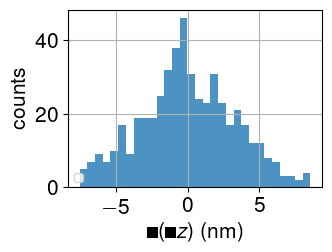

dz mean std 3.5134096323760932e-09 3.2648752877170046e-06


In [278]:
for t_idx, trapnr in enumerate([2,3]):
    dz_data = np.asarray(dz[t_idx])
    
    plt.hist(dz_data*1e6, bins=30, alpha=0.8)
    f = plt.gcf()
    f.set_figwidth(3.6)
    f.set_figheight(2.8)
    plt.xlabel(r'$\Delta (\Delta$' + '$z)$ (nm)')
    plt.ylabel(r'counts')
    plt.tight_layout()
    plt.legend(loc='lower left',prop={'size': 8})
    plt.grid()
    plt.savefig("ddz_distribution_trap"+str(trapnr)+".pdf", dpi=100, patch=0.5)
    plt.show()
    print('dz mean std', np.mean(dz_data), np.std(dz_data))

No handles with labels found to put in legend.


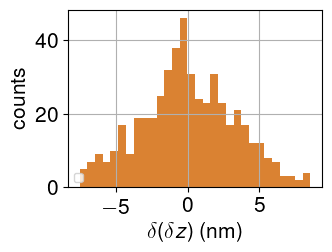

dz mean std 3.5134096323760932e-09 3.2648752877170046e-06


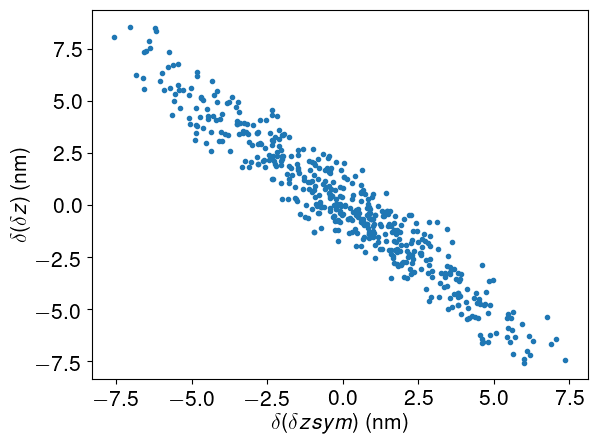

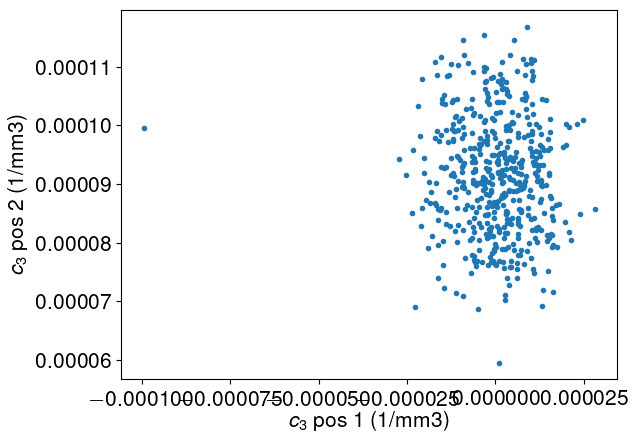

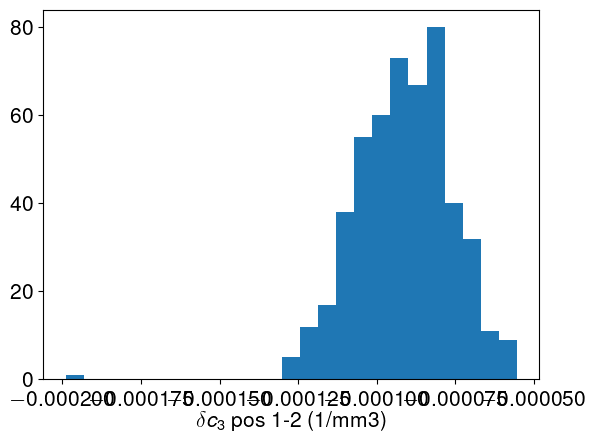

No handles with labels found to put in legend.


dc3 mean std 1.5112280324765476e-05 1.5112280324765476e-05
dz3c3 mean std 3.486936553112307e-06 4.672703623705078e-07
domzc3 mean std 1.600344942383741e-08 3.784094201246022e-09 3.244250858407084e-13
dzc3, domzomzc3 3.030537498281847e-07 -3.826732303538498e-10 -3.2808061587264216e-14
dz both 3.4904499627446832e-06 3.5865272746124683e-06


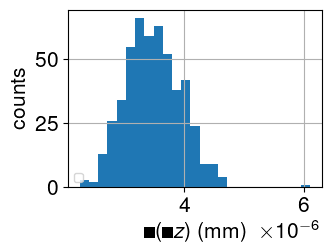

2 0


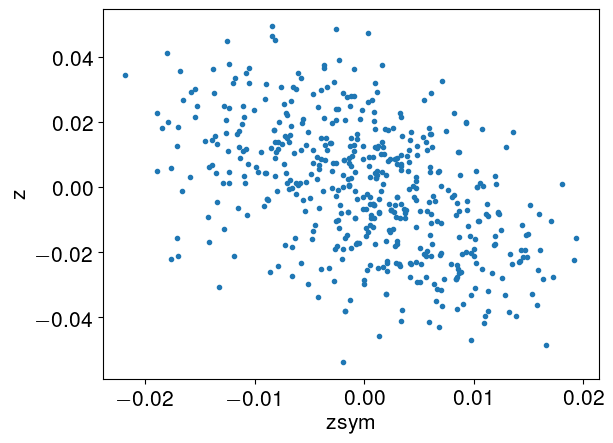

2 0


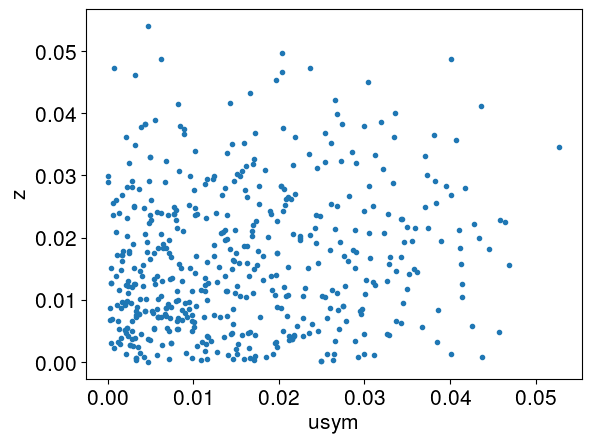

2 1


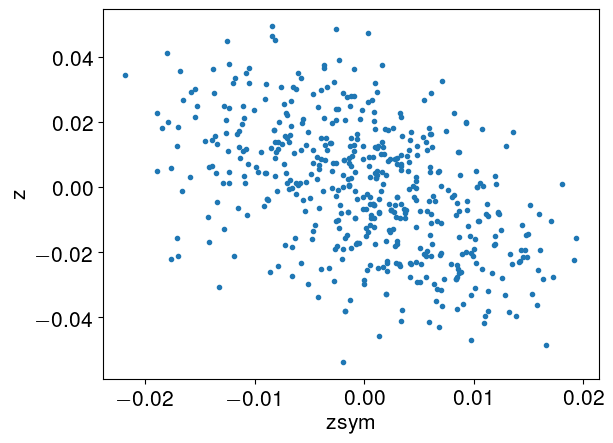

2 1


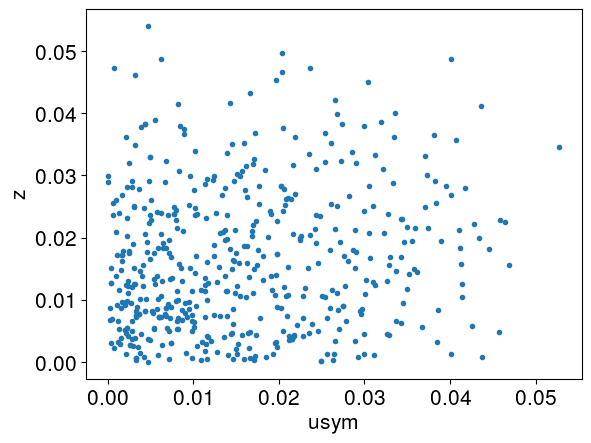

No handles with labels found to put in legend.


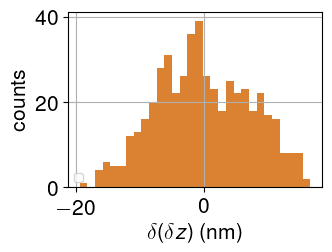

dz mean std 5.5369949123431265e-09 7.35168392991987e-06


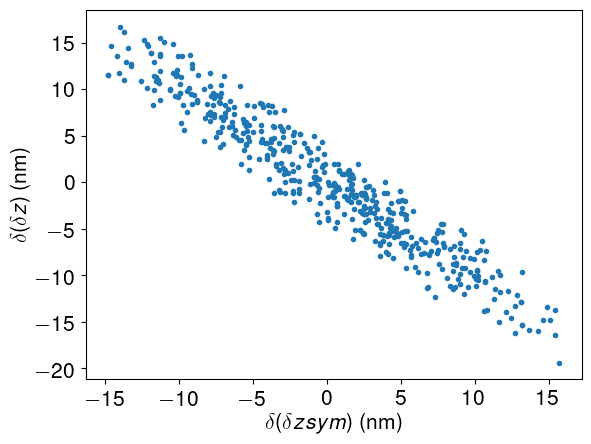

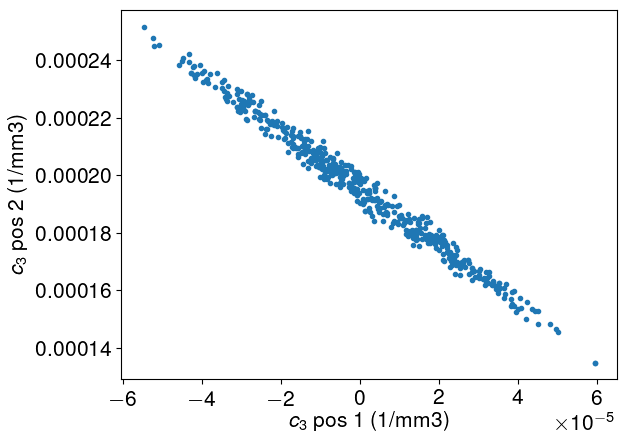

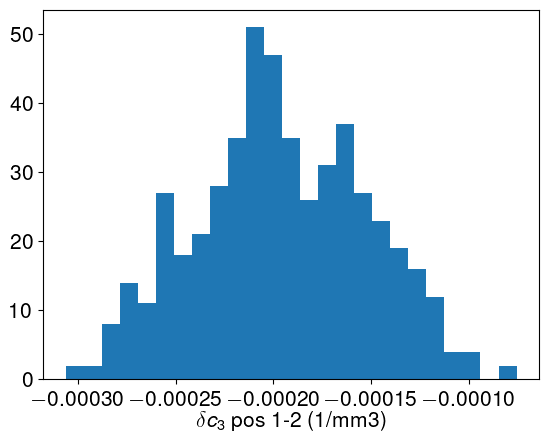

No handles with labels found to put in legend.


dc3 mean std 4.38760848612927e-05 4.38760848612927e-05
dz3c3 mean std 7.4739278362738215e-06 1.3462621716250047e-06
domzc3 mean std 7.345556528630946e-08 1.6645618258364302e-08 1.4270934720819876e-12
dzc3, domzomzc3 8.79868011924319e-07 -3.2256988266985564e-09 -2.7655168267305865e-13
dz both 7.479464831186165e-06 6.292876351269703e-06


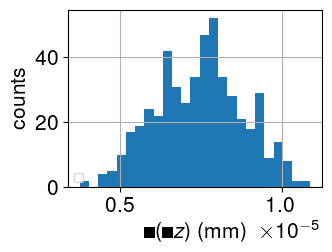

3 0


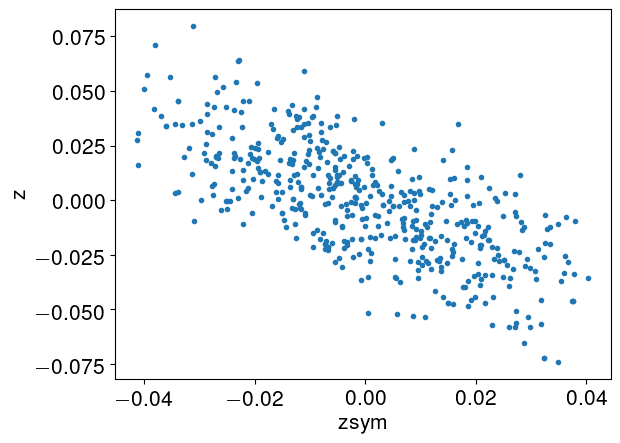

3 0


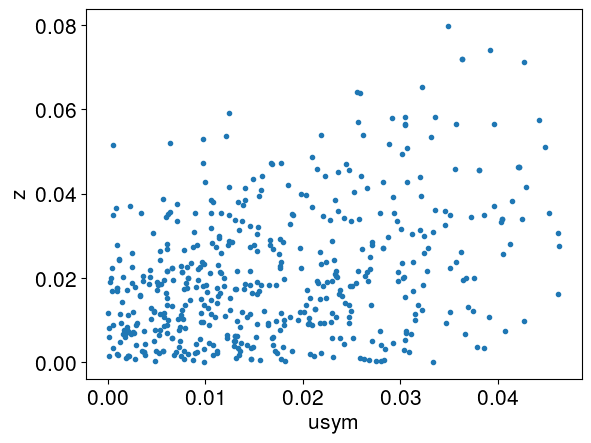

3 1


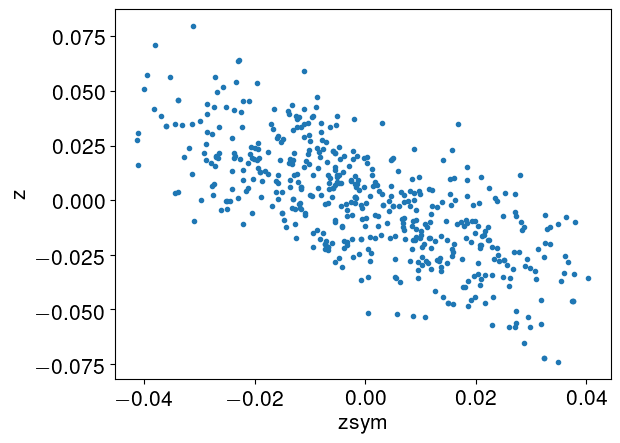

3 1


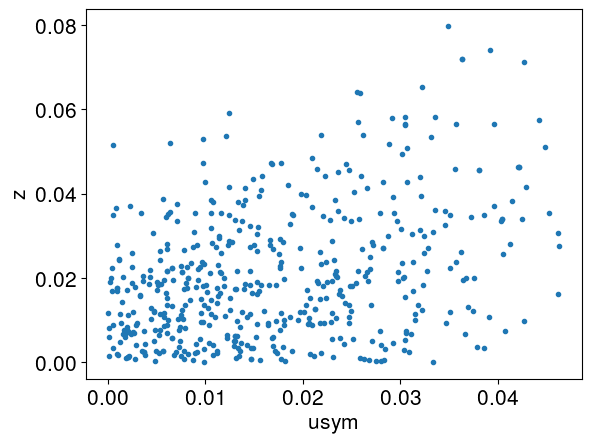

In [281]:
for t_idx, trapnr in enumerate([2, 3]):
    dz_data = np.asarray(dz[t_idx])
    
    plt.hist(dz_data*1e6, bins=30, alpha=0.8)
    f = plt.gcf()
    f.set_figwidth(3.6)
    f.set_figheight(2.8)
    plt.hist(dz_data*1e6, bins=30, alpha=0.8)

    plt.xlabel(r'$\delta (\delta z)$ (nm)')
    plt.ylabel(r'counts')
    plt.tight_layout()
    plt.legend(loc='lower left',prop={'size': 8})
    plt.grid()
    plt.show()
    print('dz mean std', np.mean(dz_data), np.std(dz_data))

    plt.xlabel(r'$\delta (\delta zsym)$ (nm)')
    plt.ylabel(r'$\delta (\delta z)$ (nm)')
    plt.plot(np.asarray(dzsym[t_idx])*1e6, np.asarray(dz_data)*1e6, '.')
    plt.show()
               
    plt.xlabel(r'$c_3$ pos 1 (1/mm3)')
    plt.ylabel(r'$c_3$ pos 2 (1/mm3)')
    c3[t_idx][0] = np.asarray(c3[t_idx][0])
    c3[t_idx][1] = np.asarray(c3[t_idx][1])
    plt.plot(c3[t_idx][0], c3[t_idx][1], '.')
    plt.show()
    
    dc3 = (np.asarray(c3[t_idx][0]) - np.asarray(c3[t_idx][1]))
    #print(c3[t_idx])
    plt.xlabel(r'$\delta c_3$ pos 1-2 (1/mm3)')
    plt.hist(dc3, bins=25)
    plt.show()
    
    dc3 = np.std(dc3)
    z_12C6 = 27.6e-3
    z_20Ne10 = 21.5e-3
    print('dc3 mean std', np.mean(dc3), dc3)
    dz3c3 = 3/4*c3[t_idx][0]/(roux_c2.n)*(z_20Ne10**2) - 3/4*c3[t_idx][1]/(roux_c2.n)*(z_12C6 **2)
    print('dz3c3 mean std', np.mean(dz3c3), np.std(dz3c3))
    domzc3 = 1/16*c3[t_idx][0]**2/((roux_c2.n)**2)*(-15*(z_12C6)**2) - 1/16*c3[t_idx][1]**2/((roux_c2.n)**2)*(-15*(z_20Ne10)**2)
    dinv = domzc3*500e3**2/54e6**2
    print('domzc3 mean std', np.mean(domzc3), np.std(domzc3), np.std(dinv))
    dz3 = 3/4*dc3/(roux_c2.n)*(-(20e-3)**2)
    domzomz = 1/16*dc3**2/((roux_c2.n)**2)*(-15*(20e-3)**2)
    dinv = domzomz*500e3**2/54e6**2
    print('dzc3, domzomzc3', dz3, domzomz, dinv)
    print('dz both', np.mean(dz3c3+dz_data), np.std(dz3c3+dz_data))
    
    plt.hist(dz3c3, bins=25)
    #plt.hist(dz3c3+dz_data, bins=25)

    f = plt.gcf()
    f.set_figwidth(3.6)
    f.set_figheight(2.8)
    
    plt.xlabel(r'$\Delta (\Delta z)$ (mm)')
    plt.ylabel(r'counts')
    plt.tight_layout()
    plt.legend(loc='lower left',prop={'size': 8})
    plt.grid()
    #plt.savefig("ddz_distribution.pdf", dpi=100, patch=0.5)
    plt.show()

    
    for p_idx in range(2):
        print(trapnr, p_idx)
        plt.plot(zsym[t_idx][p_idx], z[t_idx][p_idx], '.')
        plt.xlabel('zsym')
        plt.ylabel('z')
        plt.show()
        
        print(trapnr, p_idx)
        plt.plot(np.abs(np.asarray(usym[t_idx][p_idx])), np.abs(z[t_idx][p_idx]), '.')
        plt.xlabel('usym')
        plt.ylabel('z')
        plt.show()
    
        

        

trap, pos 2 1
500
[-1.152933435043e+00 -6.840215601607e-04] [0.096395756539 0.000785016473]
-0.02019719633961151


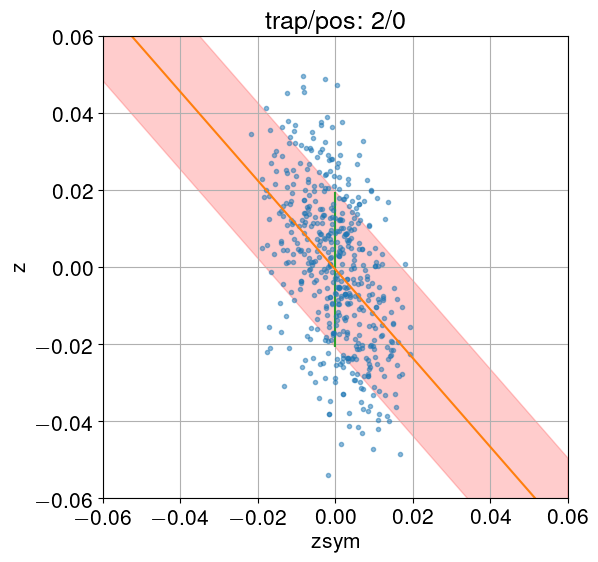

trap, pos 2 2
500
[-1.152959942514e+00 -6.840695064852e-04] [0.096430212863 0.000785007801]
-0.020197437897838996


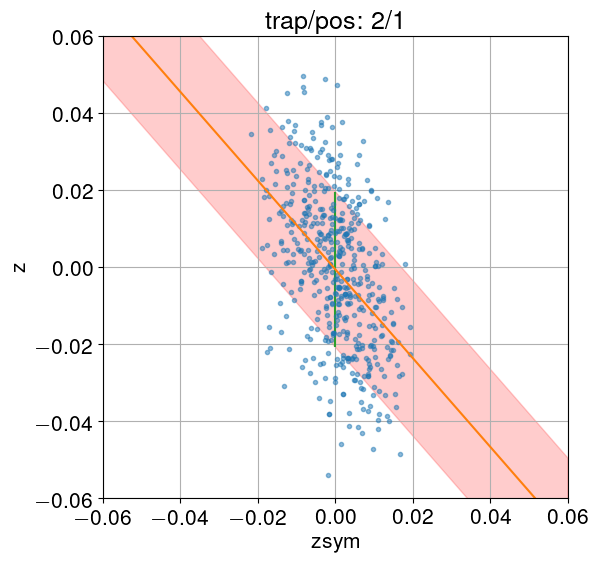

[-1.033191699293e+00  4.439618149053e-08] [1.373137885462e-02 4.160351125241e-08]
-9.591544032127969e-07


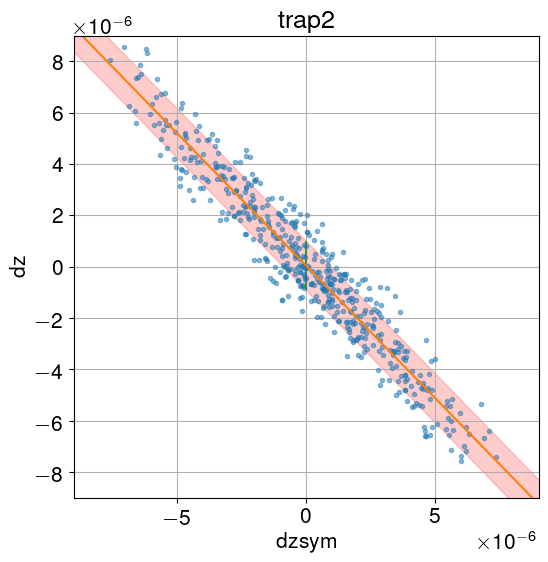

[2.603863870443e-02 2.084778419666e-09] [1.405029172736e-01 1.465004732962e-07]


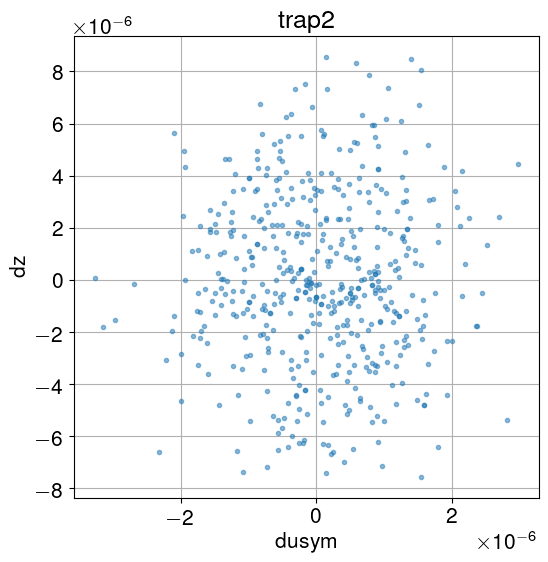

[5.244925796177e-09 4.199339388184e-16] [2.830130190797e-08 2.950938104966e-14]
mean/std(deltaz) 3.5134096323760932e-09 3.2648752877170046e-06
mean/std(deltaR) 7.077010830928981e-16 6.576391650972823e-13


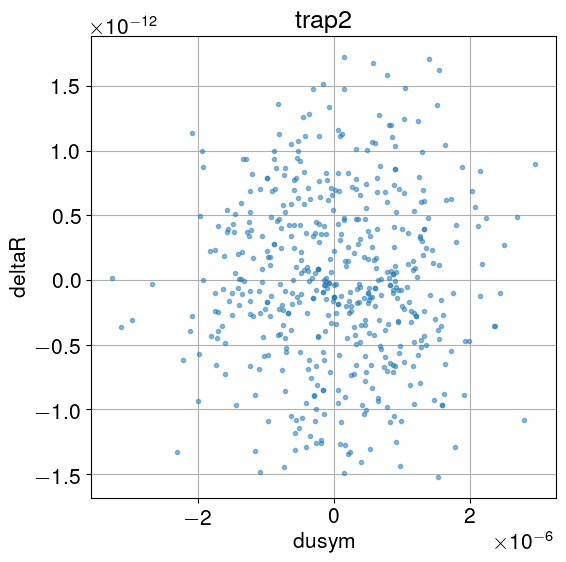

trap, pos 3 1
500
[-9.985102116643e-01 -9.501103740642e-04] [0.044390943276 0.00081865756 ]
-0.01824087458333336


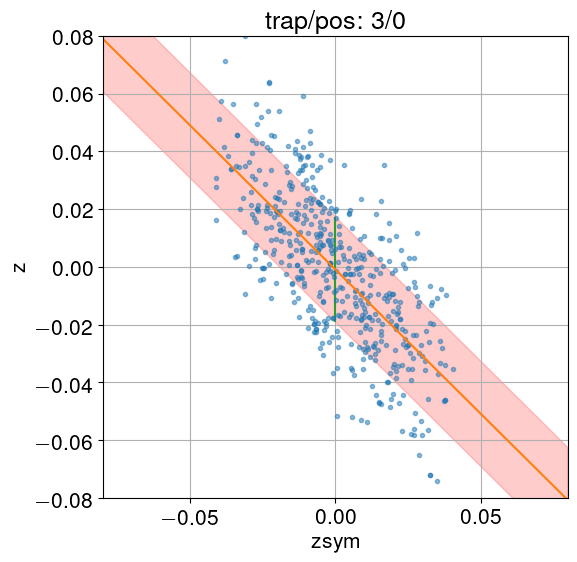

trap, pos 3 2
500
[-9.985224950500e-01 -9.501732424157e-04] [0.044376160524 0.000818689982]
-0.01824182155237403


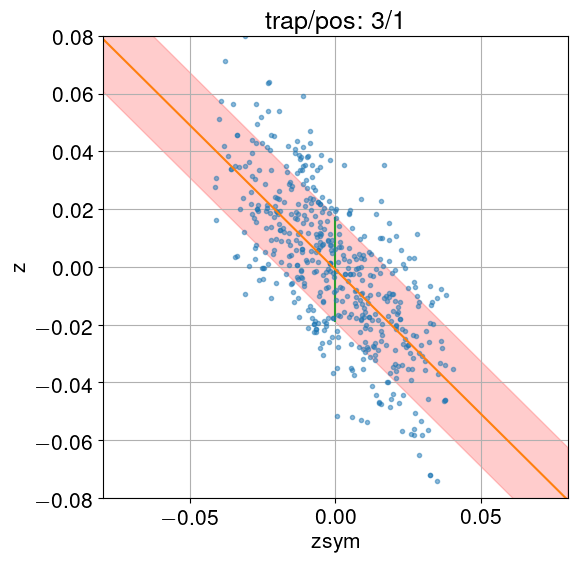

[-1.023184504326e+00  6.185417979094e-08] [1.364431244735e-02 9.396643206818e-08]
-2.1454949262681546e-06


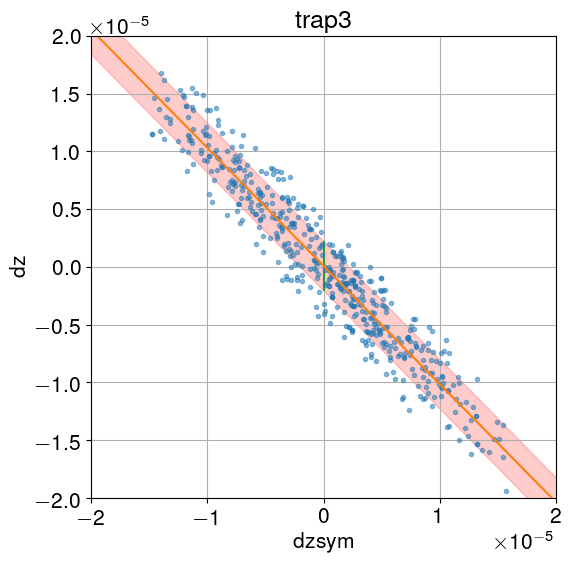

[1.291564657589e+00 3.103468463319e-08] [6.902910990633e-01 3.285677043005e-07]


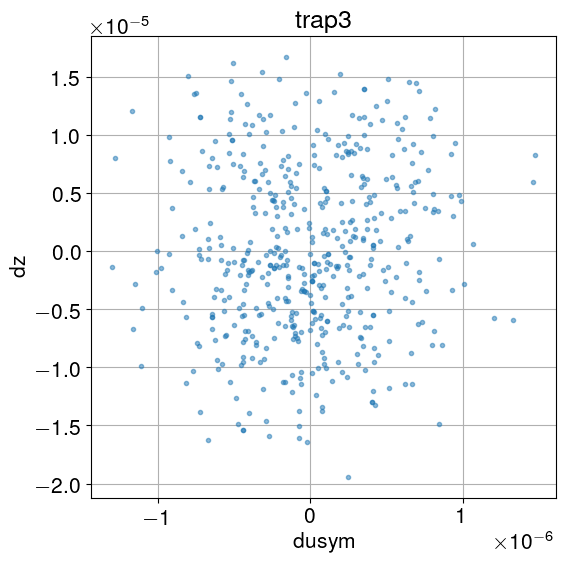

[-2.749187628296e-07 -6.605954300493e-15] [1.469333910863e-07 6.993798277254e-14]
mean/std(deltaz) 5.5369949123431265e-09 7.35168392991987e-06
mean/std(deltaR) -1.1785889170559075e-15 1.564858436511515e-12


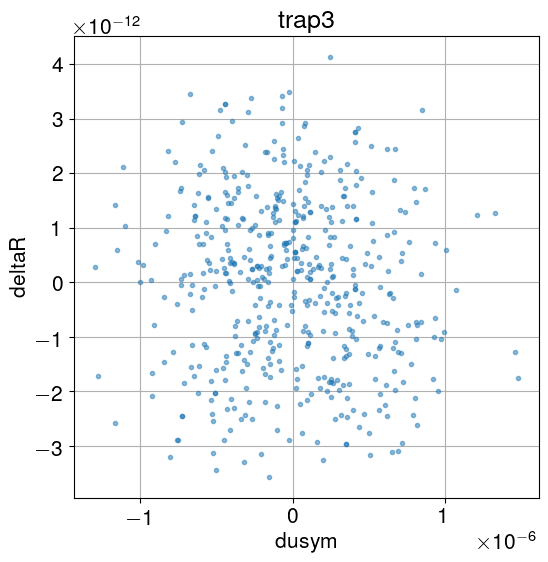

In [245]:
import math

B1 = {
    2: ufloat(1.41, 0.27)*1e-3,
    3: ufloat(-1.49, 0.16)*1e-3
}

for t_idx, trapnr in enumerate([2, 3]):
    for pos_idx, trap_settings in enumerate([trap_settings_Ne1, trap_settings_Ne2]):
        print("trap, pos", trapnr, pos_idx+1)
        z_data = z[t_idx][pos_idx]
        #print(z_data)
        print(len(z_data))
        zsym_data = zsym[t_idx][pos_idx]
        #print(zsym_data)
        
        plt.figure(figsize=(6,6))
        plt.plot(zsym_data, z_data, ".", lw=0, alpha=0.5)
        popt, pcov = np.polyfit(zsym_data, z_data, 1, cov=True)
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        mmax = math.ceil(max([max(z_data), max(zsym_data)])*100)/100
        mmin = math.floor(min([min(z_data), min(zsym_data)])*100)/100
        mmmax = max([mmax, -mmin])
        plt.ylabel("z")
        plt.xlabel("zsym")
        plt.xlim([-mmmax, mmmax])
        plt.ylim([-mmmax, mmmax])
        start, end = plt.xlim()
        xrange = np.arange(start, end+1e-3, 1e-3)
        yfit = np.polyval(popt, xrange)
        resi = z_data - np.polyval(popt, zsym_data)
        sigma = [np.std(resi)*popt[0]]*len(xrange)
        plt.plot(xrange, yfit)
        # fit confidance band stuff
        sigmas = v_sigma_y_fit(xrange, pcov=pcov, order=1)
        #plt.fill_between(tickrange, yfit - sigmas, yfit + sigmas, color='r', alpha=0.2)
        plt.fill_between(xrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
        plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
        print(sigma[0])
        plt.title("trap/pos: " + str(trapnr)+"/"+str(pos_idx))
        plt.grid()
        plt.show()

    dz_data = np.asarray(z[t_idx][0]) - np.asarray(z[t_idx][1])
    dzsym_data = np.asarray(zsym[t_idx][0]) - np.asarray(zsym[t_idx][1])
    mmax = math.ceil(max([max(dz_data), max(dzsym_data)])*1e6)*1e-6
    mmin = math.floor(min([min(dz_data), min(dzsym_data)])*1e6)*1e-6
    mmmax = max([mmax, -mmin])
    plt.figure(figsize=(6,6))
    plt.plot(dzsym_data, dz_data, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dzsym_data, dz_data, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("dz")
    plt.xlabel("dzsym")
    plt.xlim([-mmmax, mmmax])
    plt.ylim([-mmmax, mmmax])
    start, end = plt.xlim()
    xrange = np.arange(start, end+1e-3, 1e-3)
    yfit = np.polyval(popt, xrange)
    resi = dz_data - np.polyval(popt, dzsym_data)
    sigma = [np.std(resi)*popt[0]]*len(xrange)
    plt.plot(xrange, yfit)
    plt.fill_between(xrange, yfit - sigma, yfit + sigma, color='r', alpha=0.2)
    plt.errorbar(0.0, np.polyval(popt, 0.0), sigma[0])
    print(sigma[0])
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()
    
    dusym_data = np.asarray(usym[t_idx][0]) - np.asarray(usym[t_idx][1])
    #usym_data = np.asarray(usym[t_idx][0])
    plt.figure(figsize=(6,6))
    plt.plot(dusym_data, dz_data, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dusym_data, dz_data, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    plt.ylabel("dz")
    plt.xlabel("dusym")
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()
    
    
    deltaR =  B1[trapnr].n*dz_data/1000/7
    plt.figure(figsize=(6,6))
    plt.plot(dusym_data, deltaR, ".", lw=0, alpha=0.5)
    popt, pcov = np.polyfit(dusym_data, deltaR, 1, cov=True)
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    print("mean/std(deltaz)", np.mean(dz_data), np.std(dz_data))
    print("mean/std(deltaR)", np.mean(deltaR), np.std(deltaR))
    plt.ylabel("deltaR")
    plt.xlabel("dusym")
    plt.title("trap" + str(trapnr))
    plt.grid()
    plt.show()
    
